In [21]:
%matplotlib inline
#%matplotlib qt
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")

from local_plot import *
#plt.tight_layout(pad=1.0, w_pad=0.2, h_pad=1.0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rc("figure", figsize=(15,10))
bag = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 432x288 with 0 Axes>

In [28]:
nodes = [1, 4]
main_id = 1
P_align_pos_1 = np.array([-110.11, 113.44, -136.26]) # Position of putting right front gear on center
P_align_pos_4 = np.array([[-103.06, 113.44, -137.47]]) # Position of putting right front gear on center
P_align_corner = np.array([98.92,-117.94,-71]) + np.array([10, 10, 0]) - np.array([60, 0, 0])

P_vicon_in_imu ={
    1: (P_align_pos_1+P_align_corner)/1000,
    4: ( P_align_pos_4+P_align_corner)/1000
}  

if bag is not None:
    bag.close()
poses, poses_fused, poses_vo, poses_path, t0, bag = bag_read(f"/home/xuhao/bags/swarm_raw_paraller_yaw_2021-11-16/outputs/fuse_all/swarm1/swarm_local_pc.bag", nodes, True, P_vicon_in_imu=P_vicon_in_imu)

Read poses from topic /SwarmNode1/pose
Trajectory total length  60.96438249877002
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame
Read poses from topic /SwarmNode4/pose
Trajectory total length  60.212354044420664
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame
GT Yaw Offset,  6.902697377817304 pos [-2.20404463 -0.60584193 -0.34951981]
fused_offset [ 9.27085450e-04 -1.80612587e-03 -7.63949861e-05] ,  -0.00046313900753227716
VIO Offset for 1: [ 0.00093747 -0.00221959 -0.00029233]
[0. 0. 0.] [-0.00093747  0.00221959  0.00029233]
VIO Offset for 4: [ 0.14334028 -1.12858783  0.01659301]
[ 0.14596486 -1.12935935  0.01666894] [ 2.62457365e-03 -7.71525840e-04  7.59267059e-05]


/home/xuhao/anaconda3/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:605: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
../scripts/utils.py:17: RuntimeWarning: invalid value encountered in remainder
  return (data + np.pi) % (2 * np.pi) - np.pi
../scripts/utils.py:17: RuntimeWarning: invalid value encountered in remainder
  return (data + np.pi) % (2 * np.pi) - np.pi


Relative Trajectory Statistics
EST RMSE:		POS		YAW	|	BIAS: POS			YAW	|VO	RMSE:	POS		YAW
1->4	0.061,0.061,0.030	5.15°	|0.022,-0.006,+0.024	+0.67°	|	0.084,0.072,0.136	0.0°


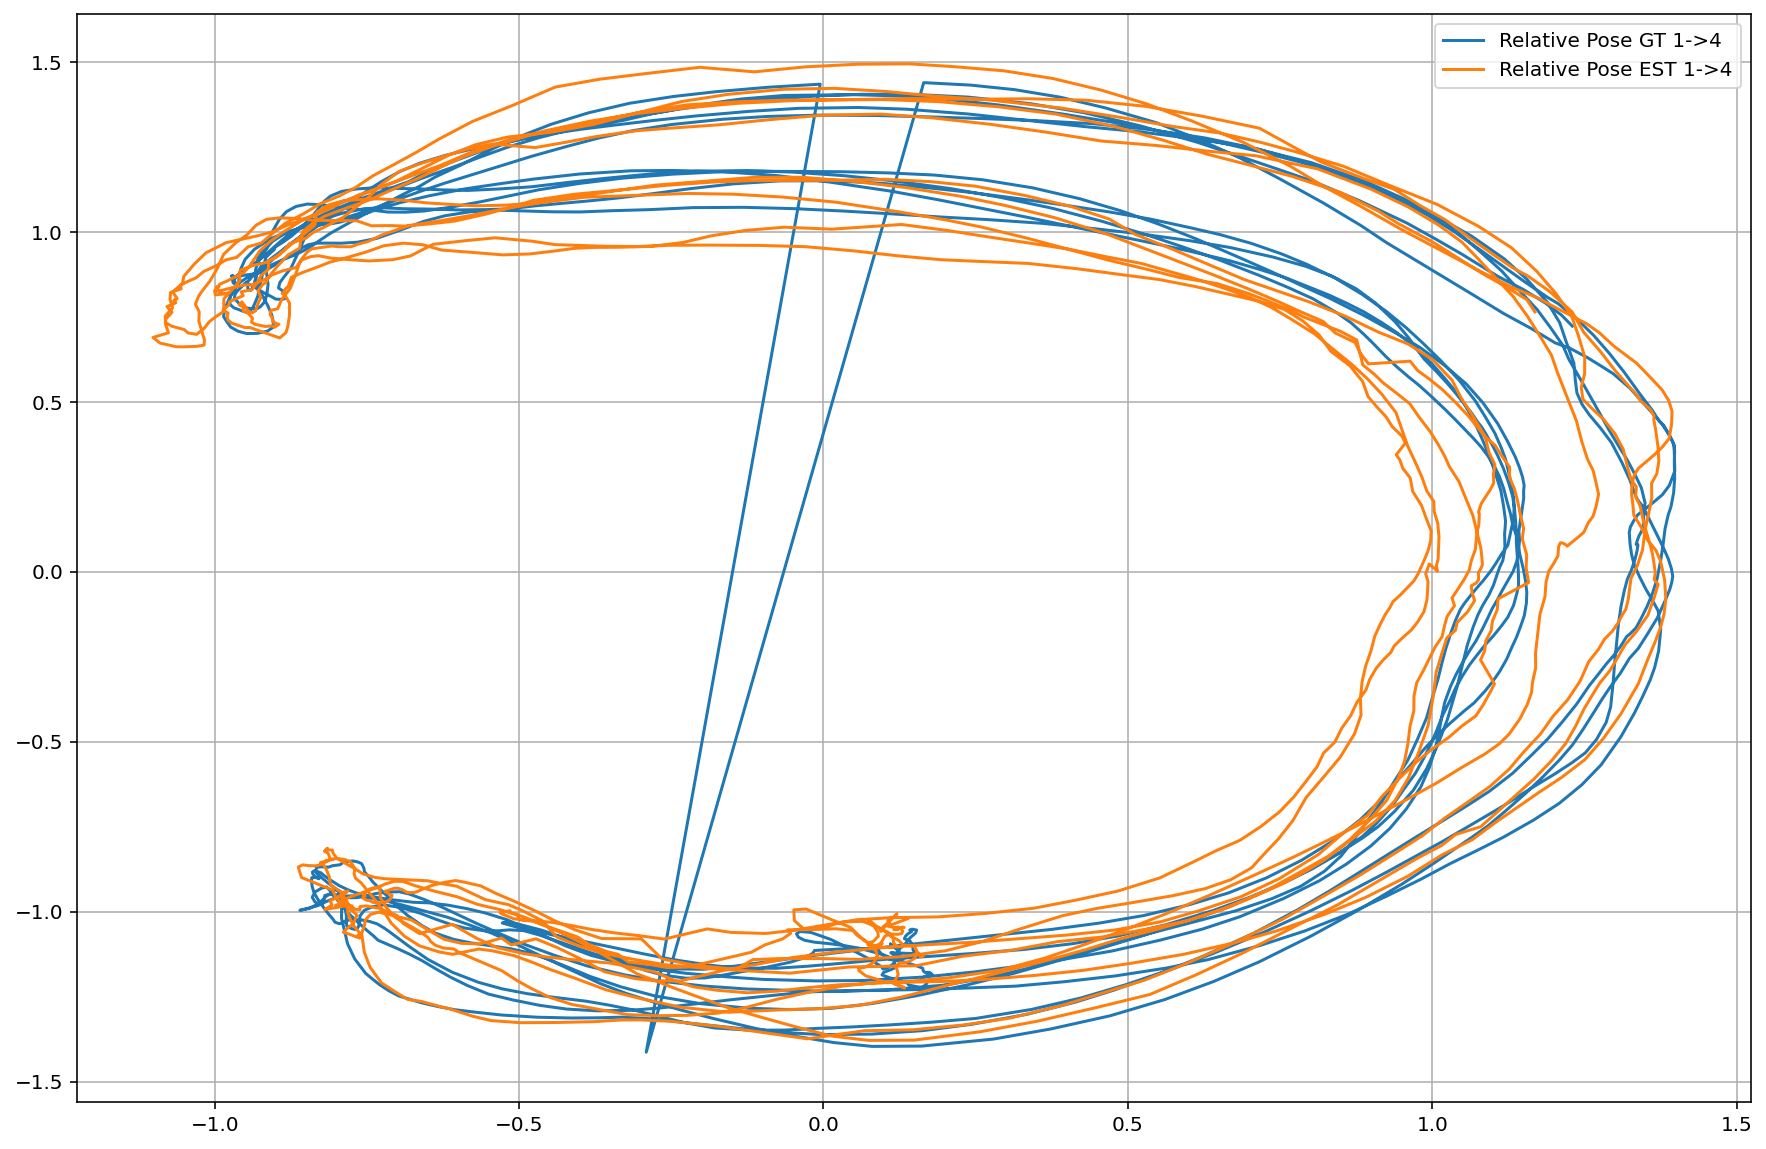

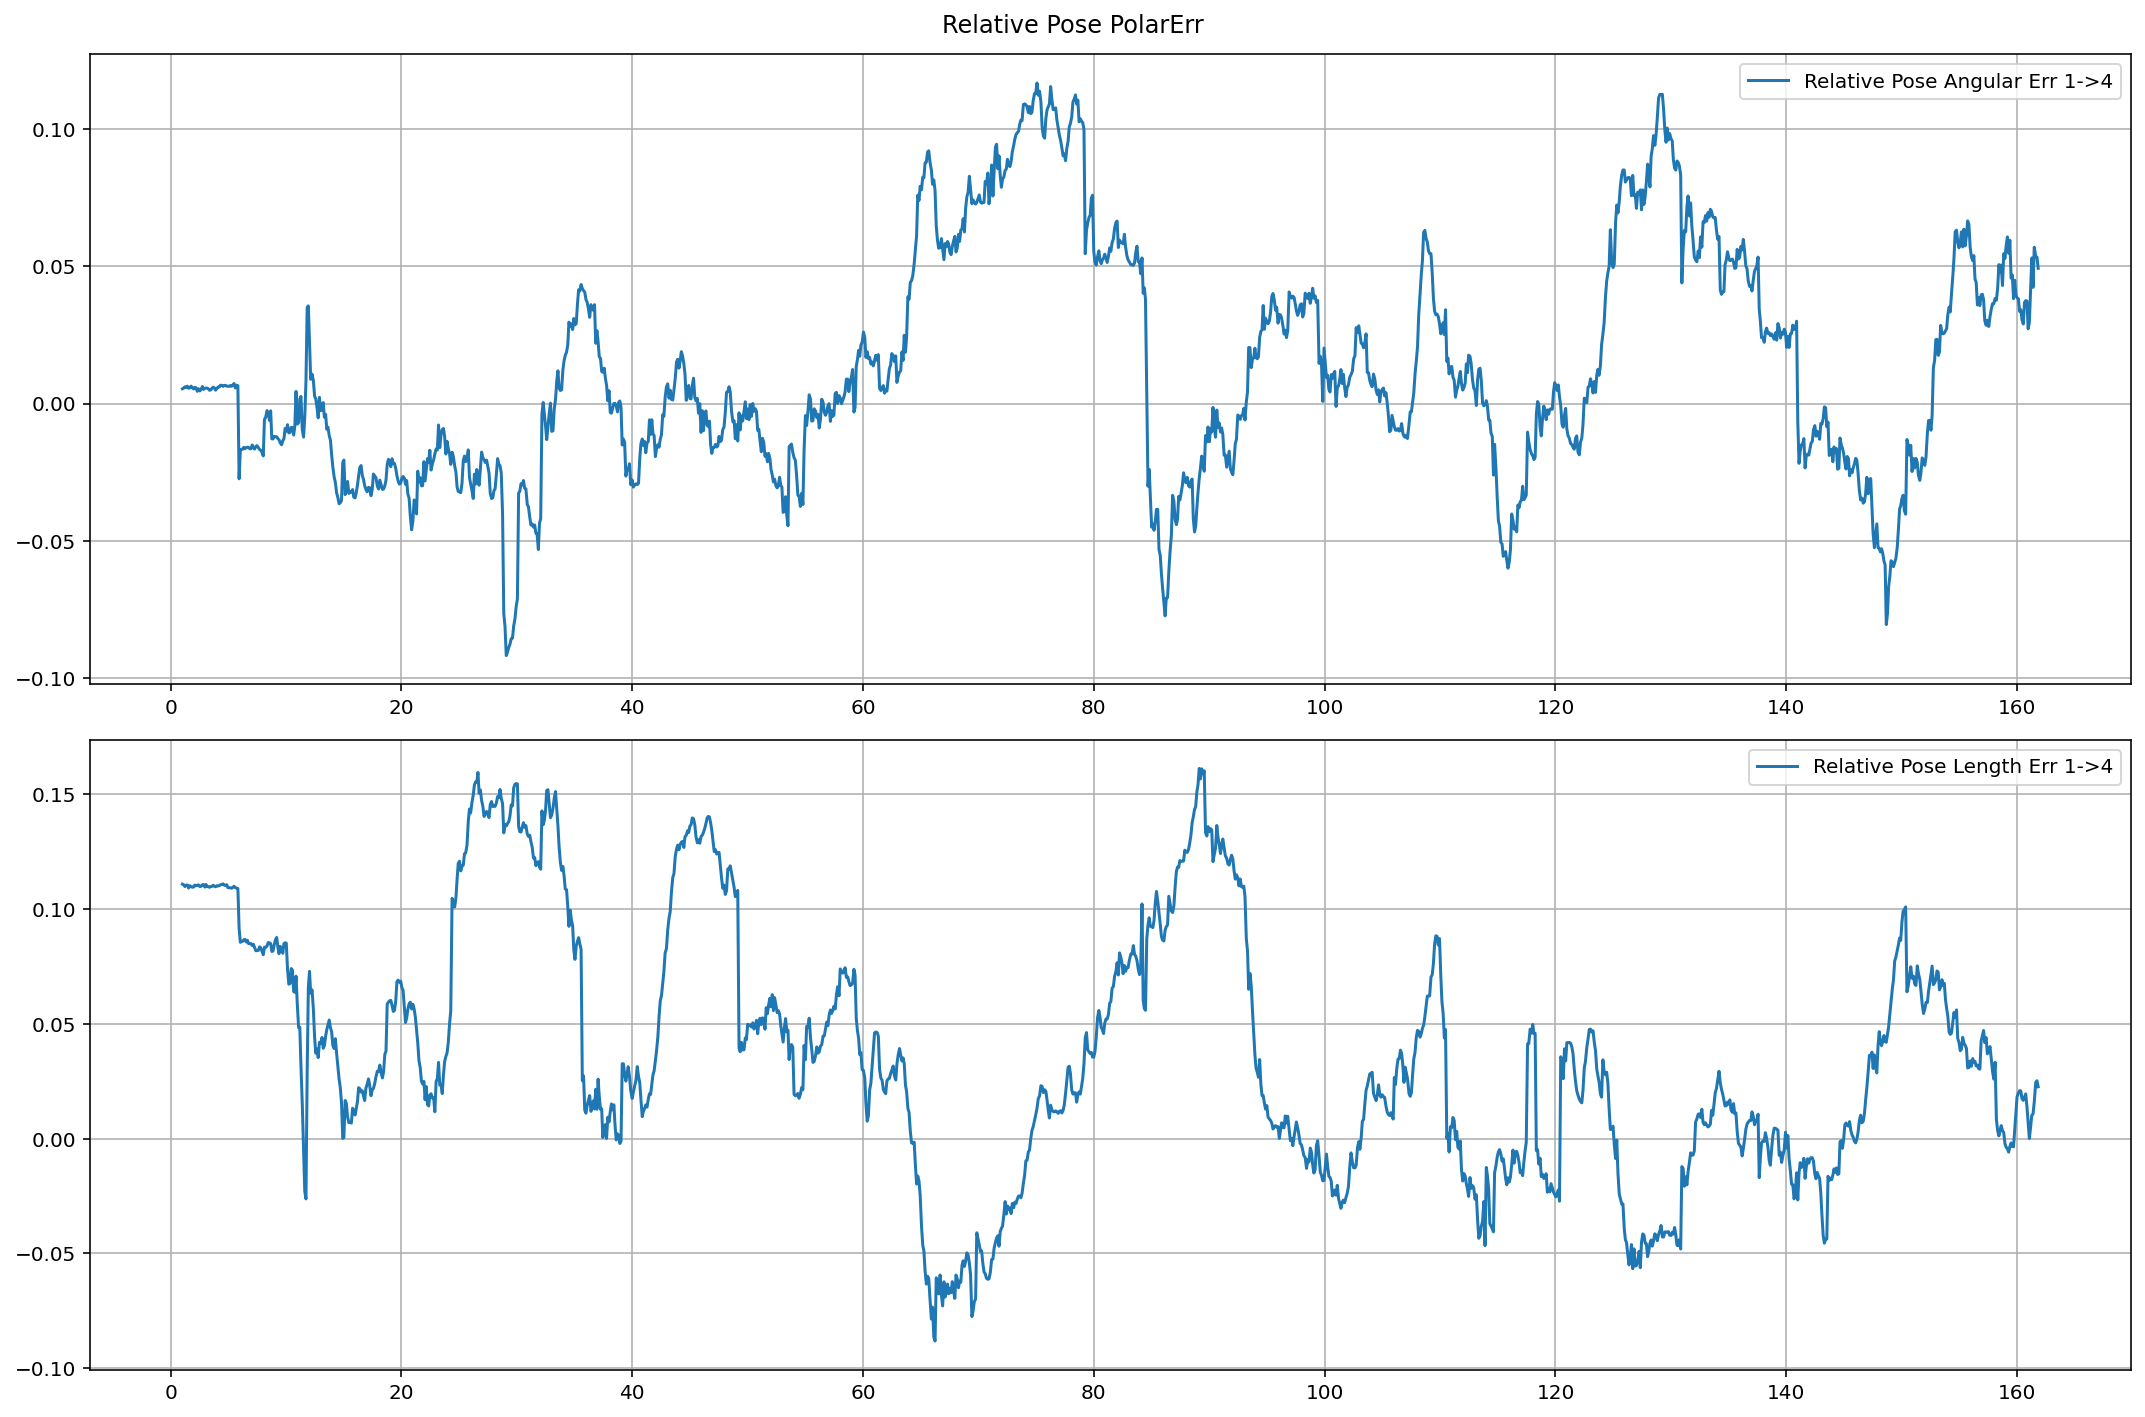

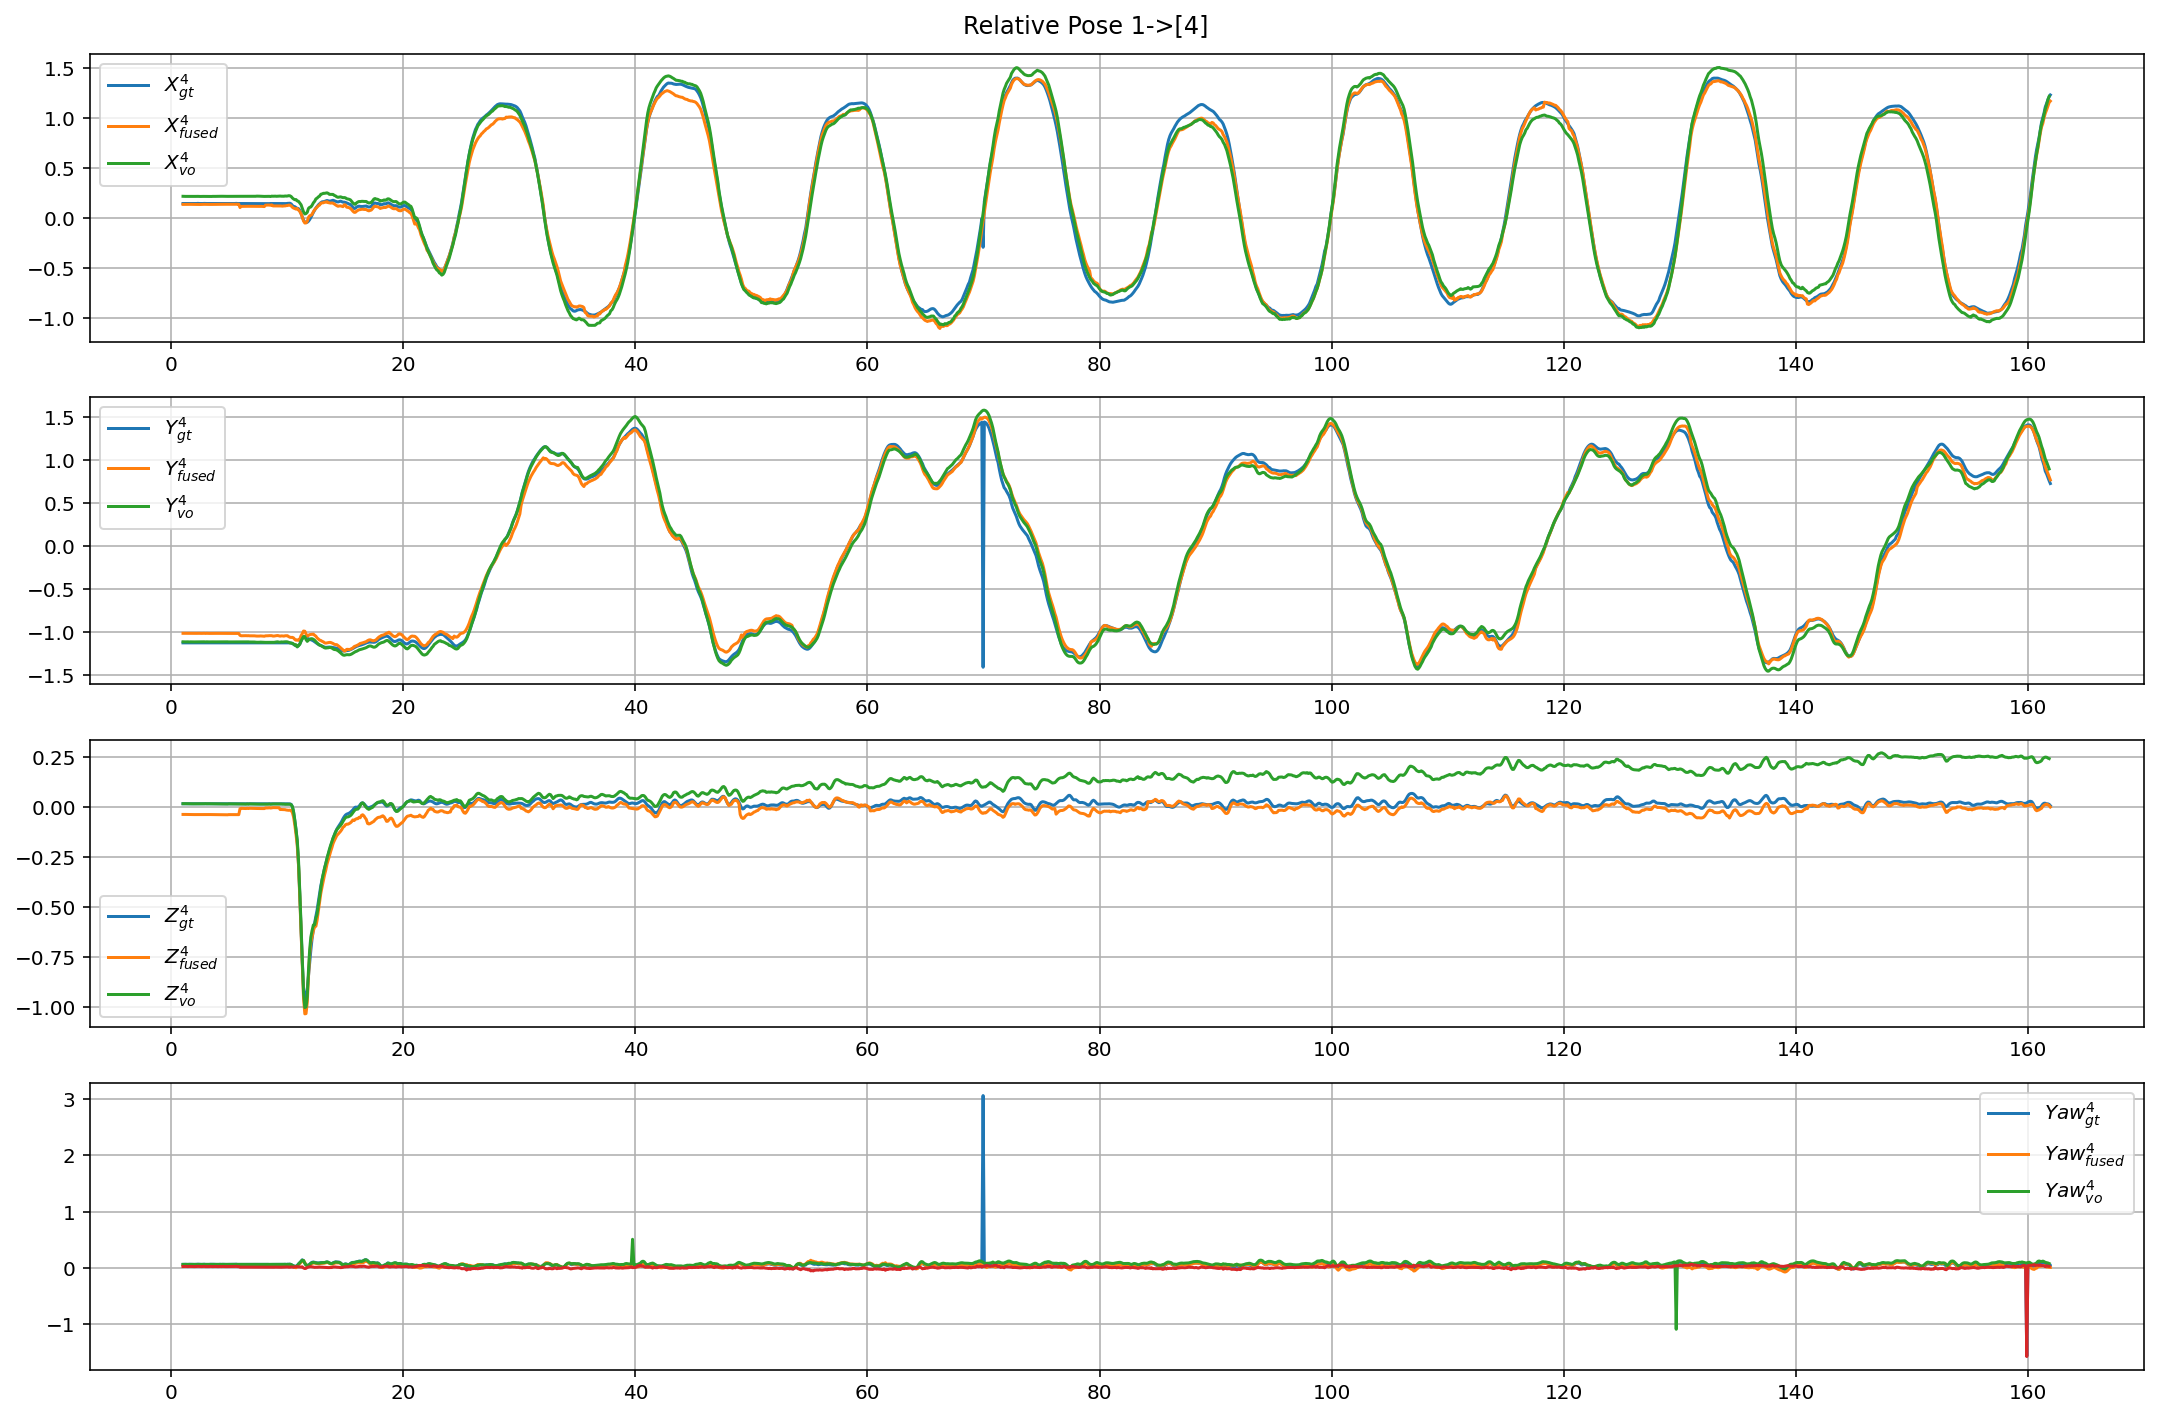

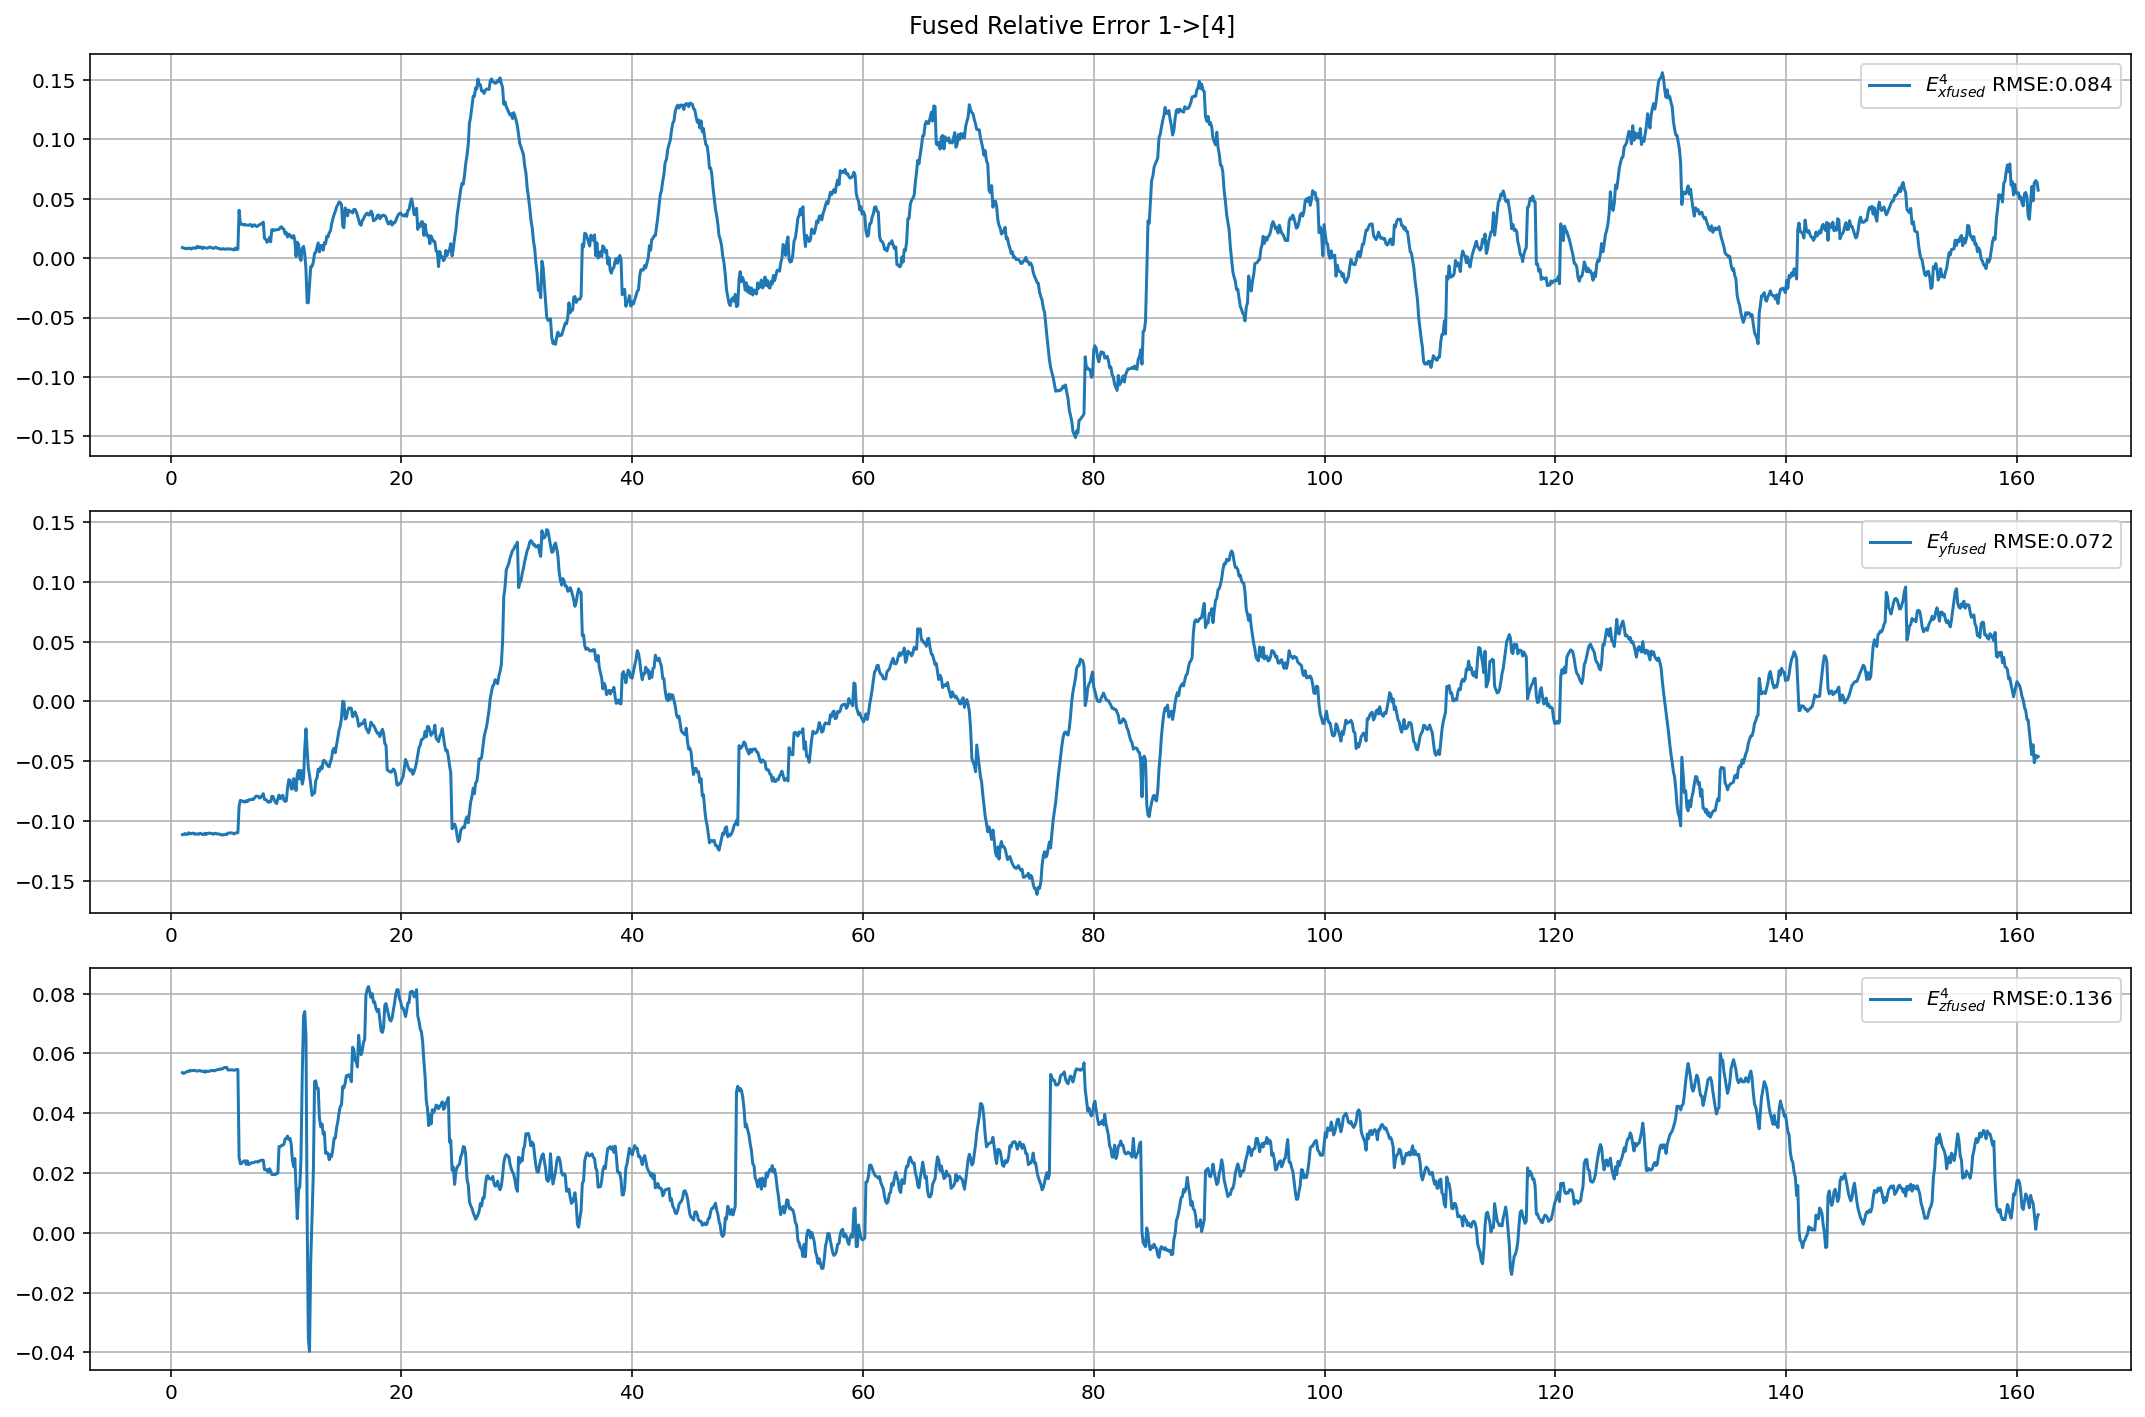

In [39]:
plt.close('all')
detections = []
loops = []
#plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes, use_offline=False, figsize=(20,10))
#plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes ,show=True,main_id=main_id)
plot_relative_pose_err(poses, poses_fused, poses_vo, 1, [4], figsize=(15, 10))
plt.show()

Outlier rate 0.00% total loops 76 inter_loops 35 outlier_num 0
Pos cov 3.0e-03, 9.1e-03, 3.8e-03
Yaw cov 2.0e-04
Pos std 5.5e-02, 9.5e-02, 6.2e-02
Yaw std 1.4e-02


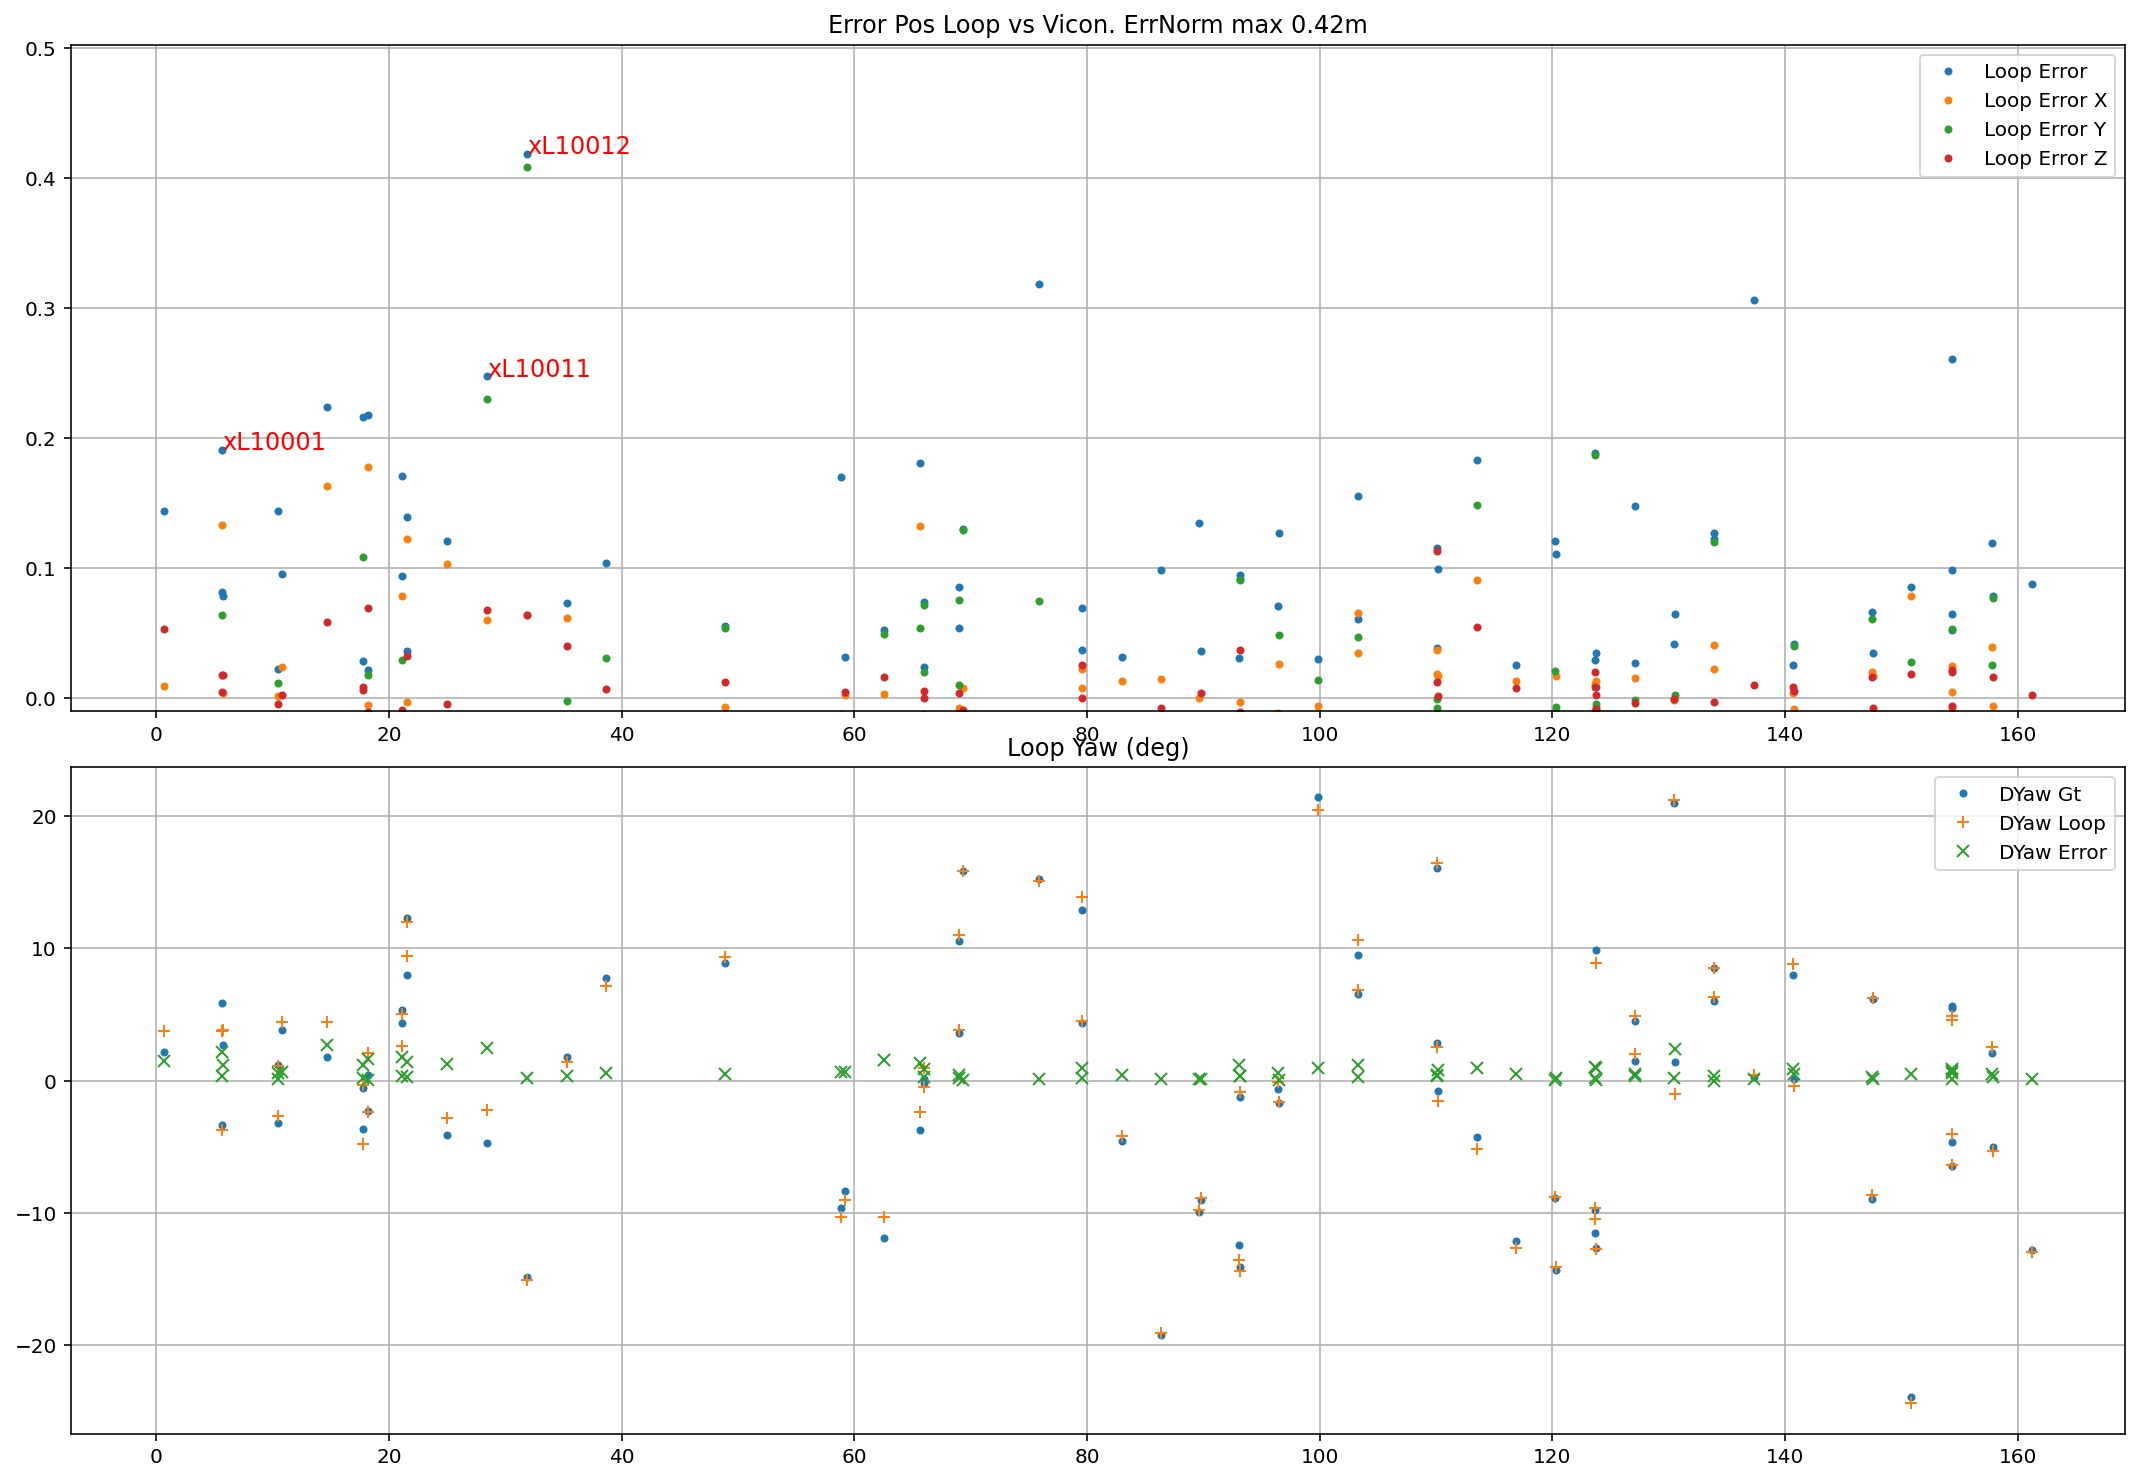

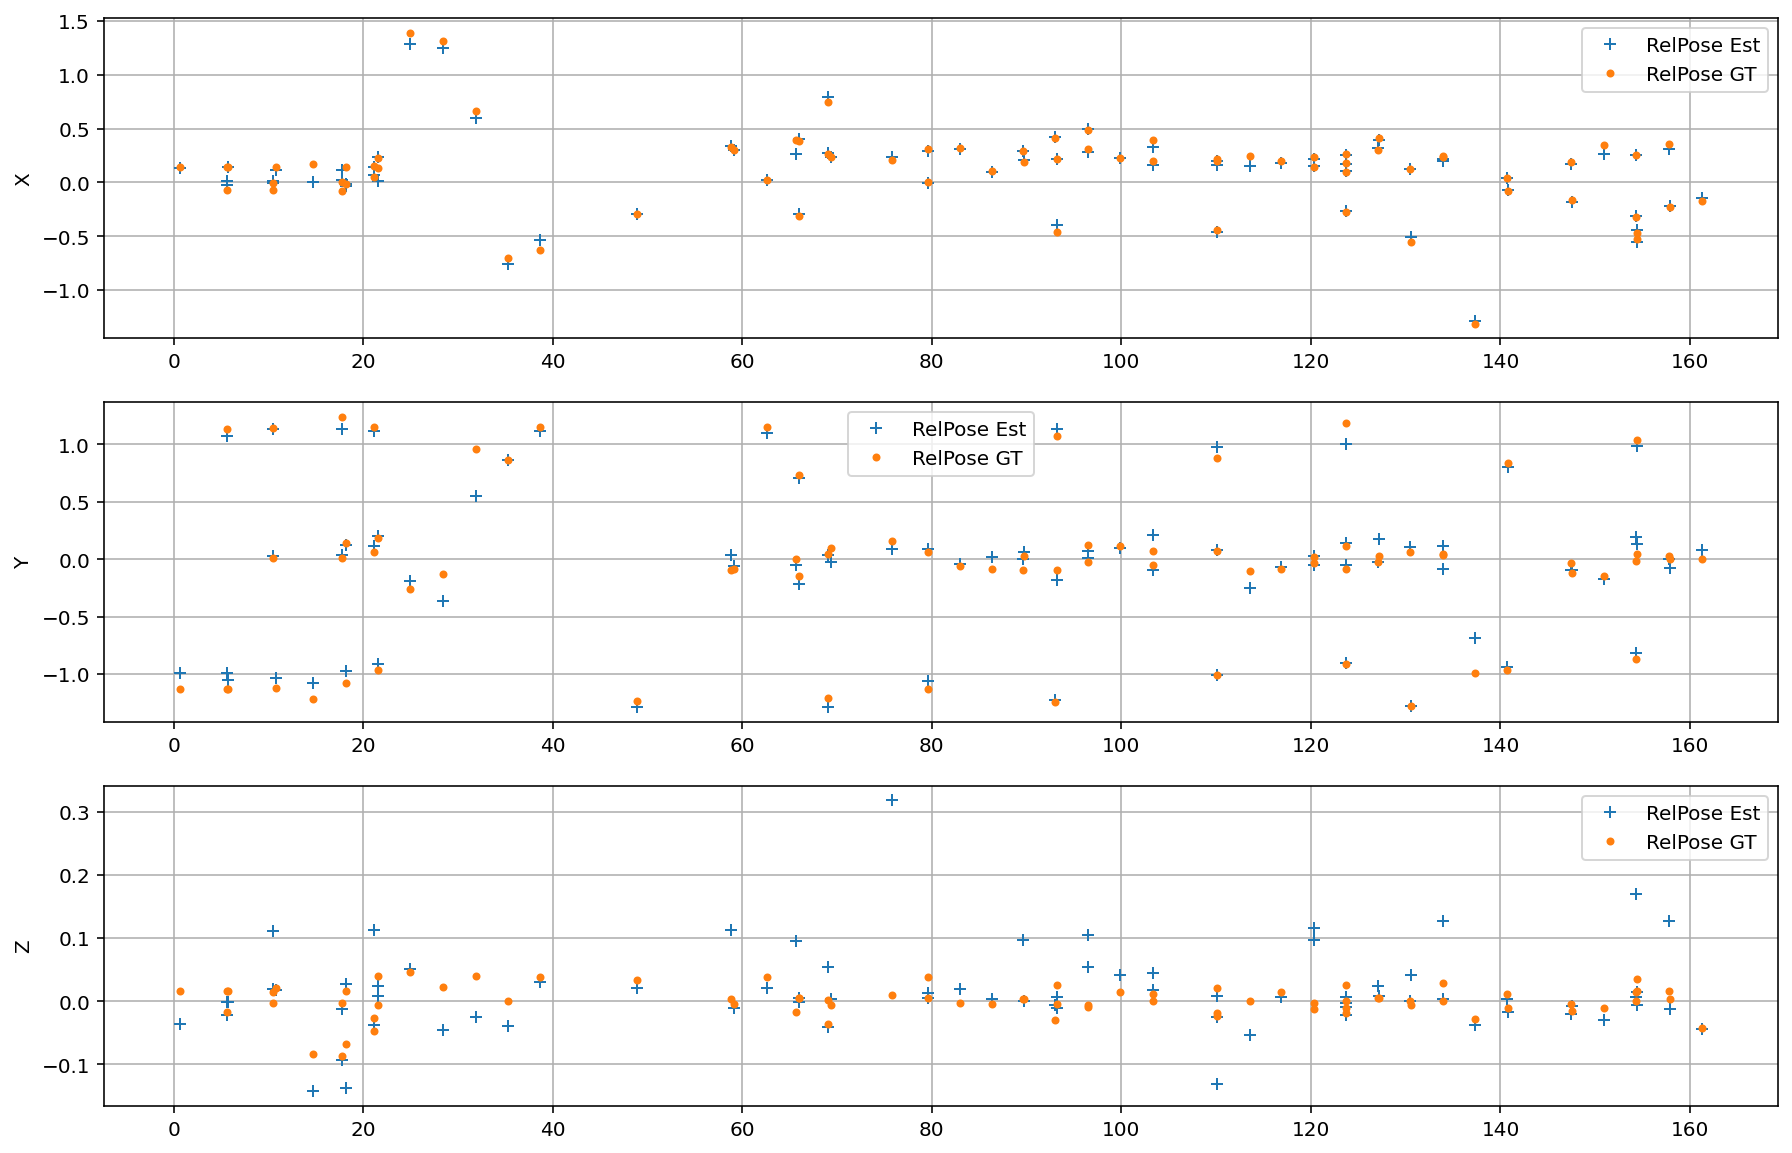

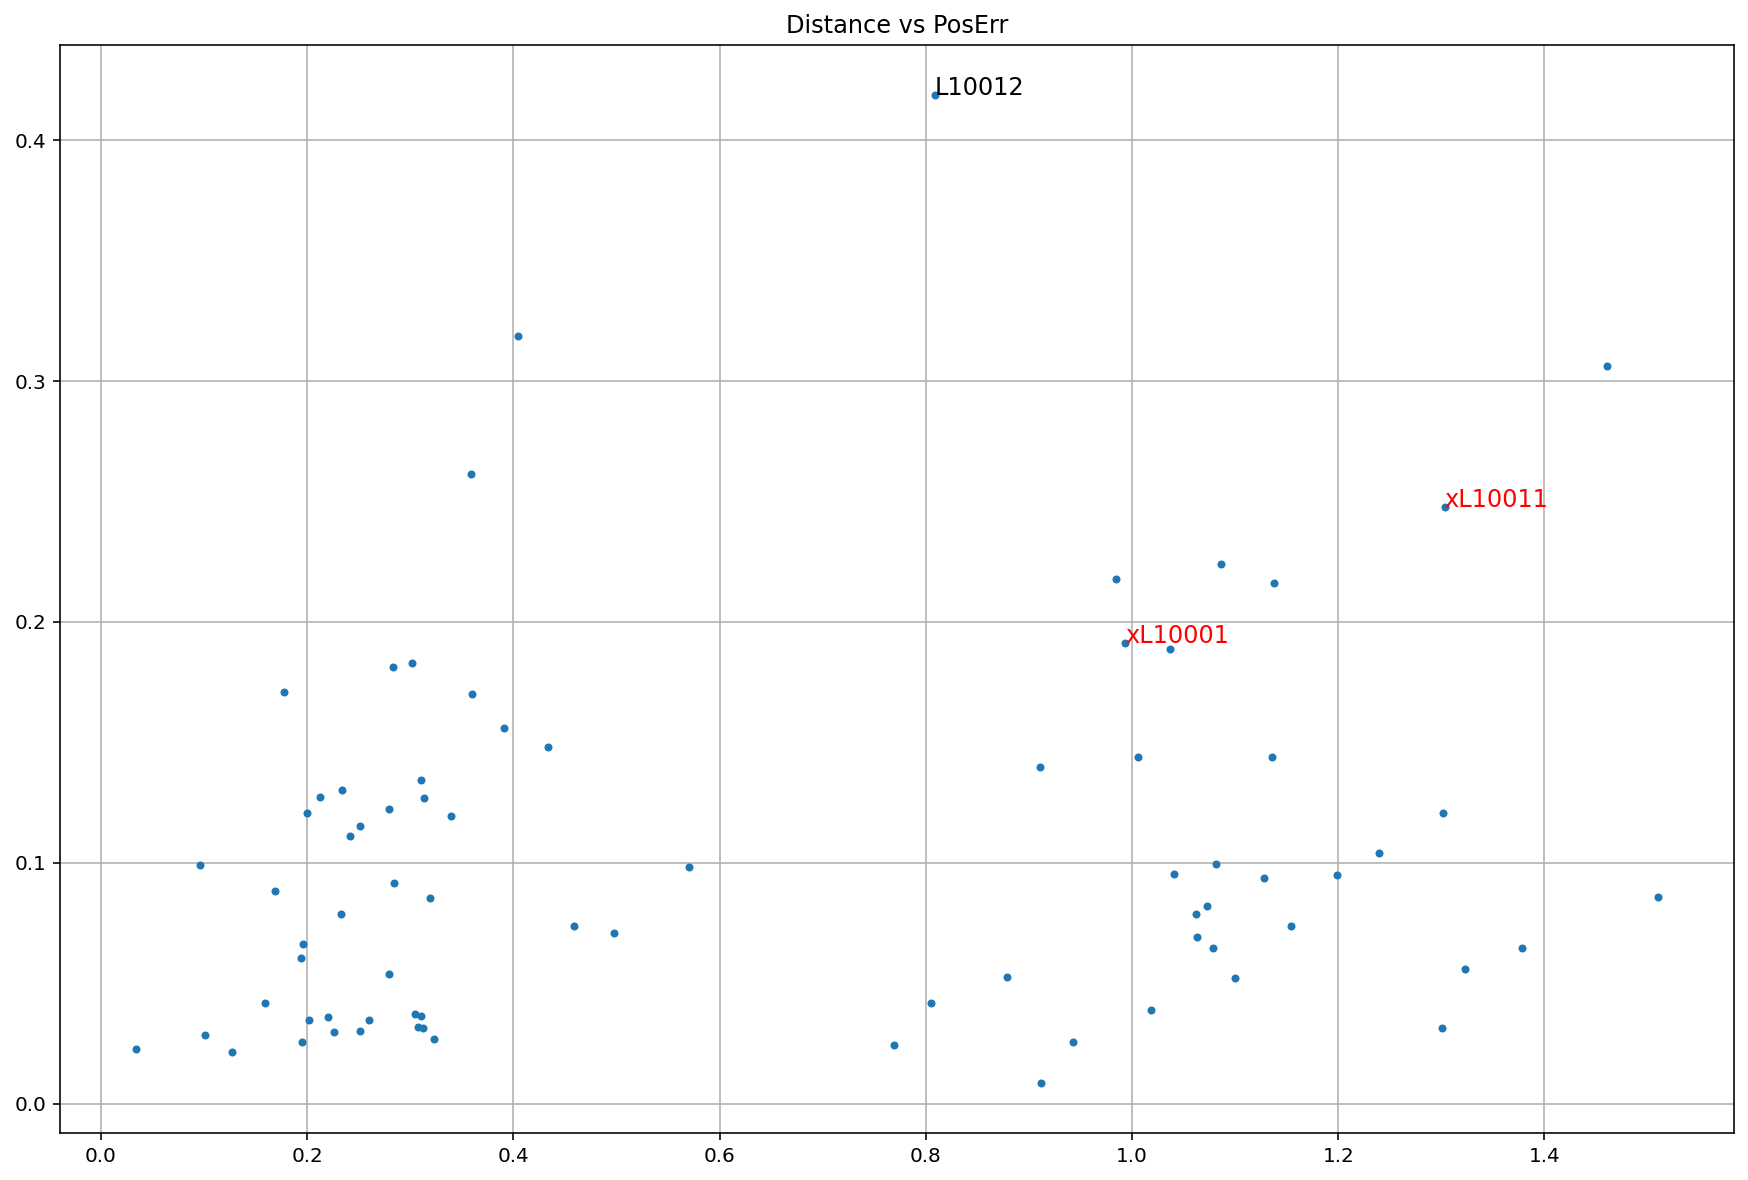

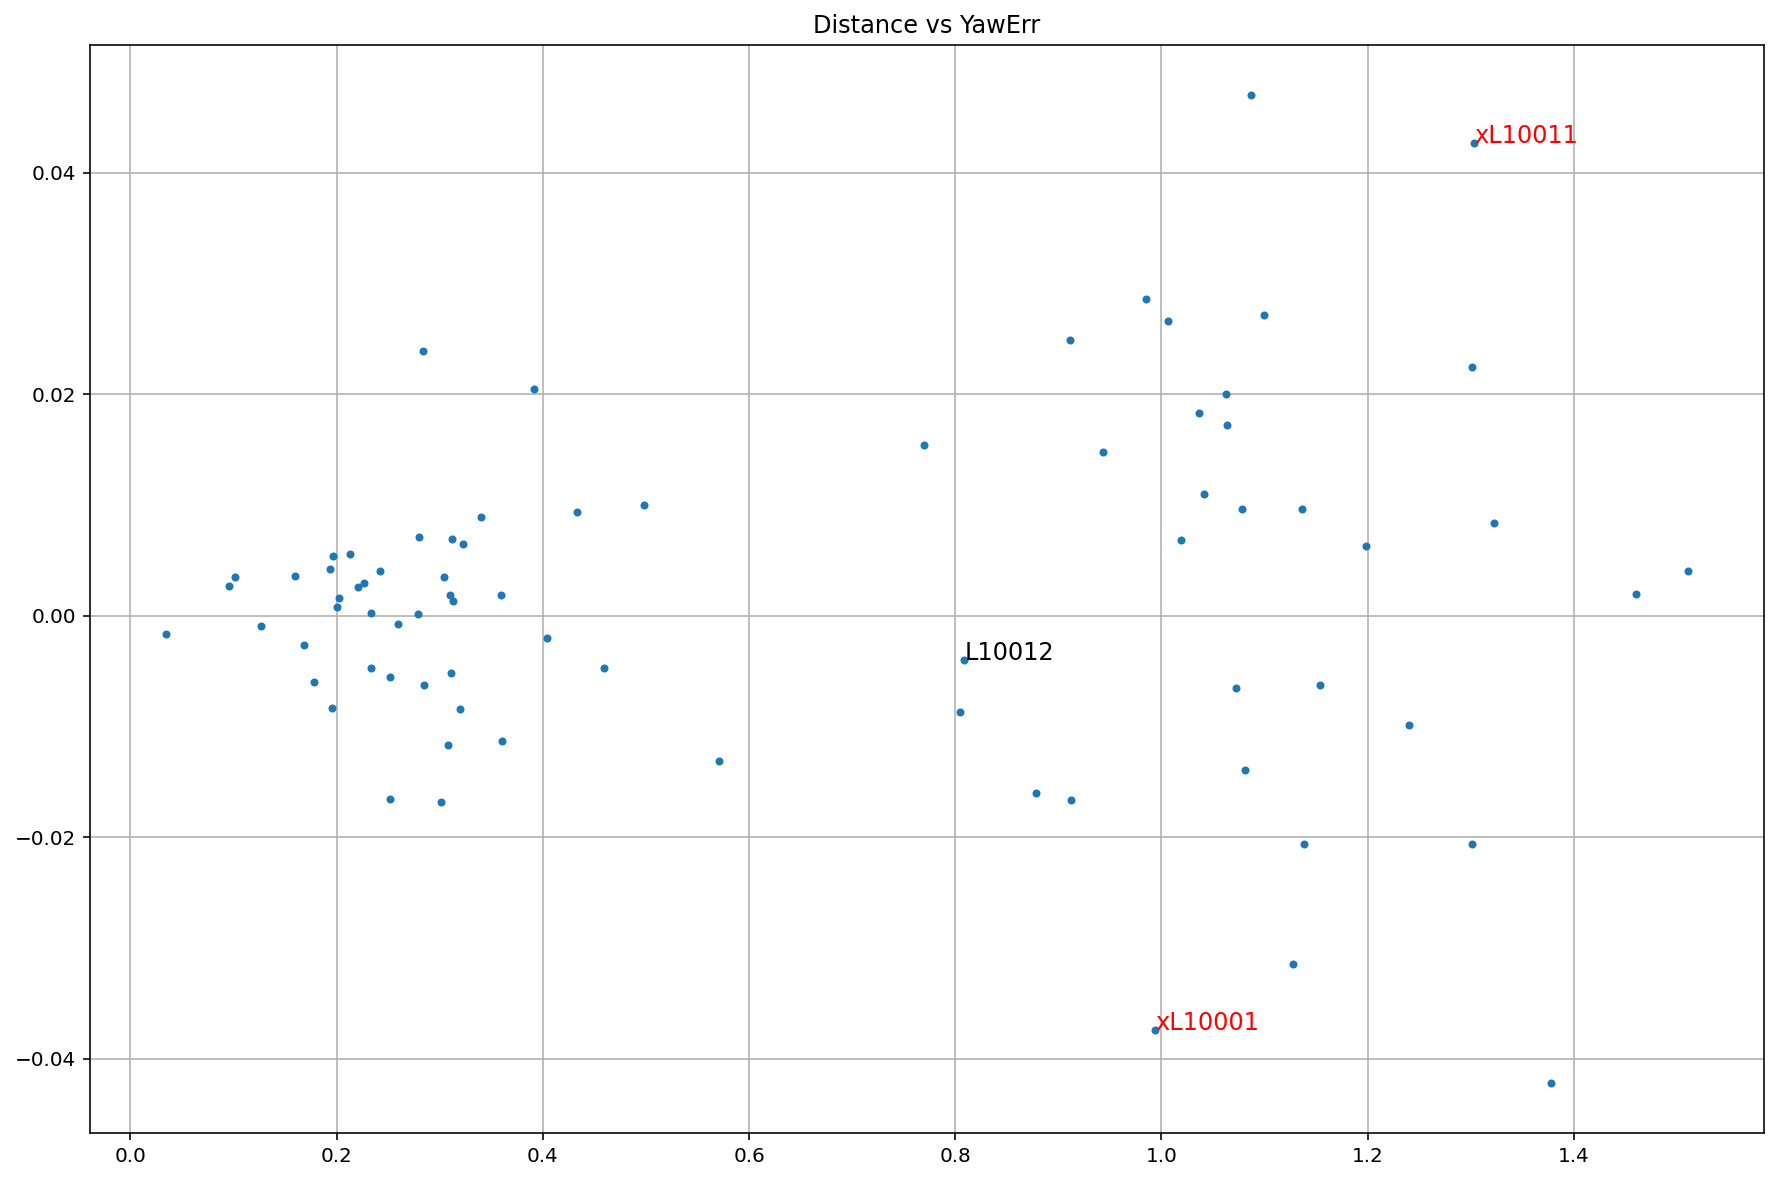

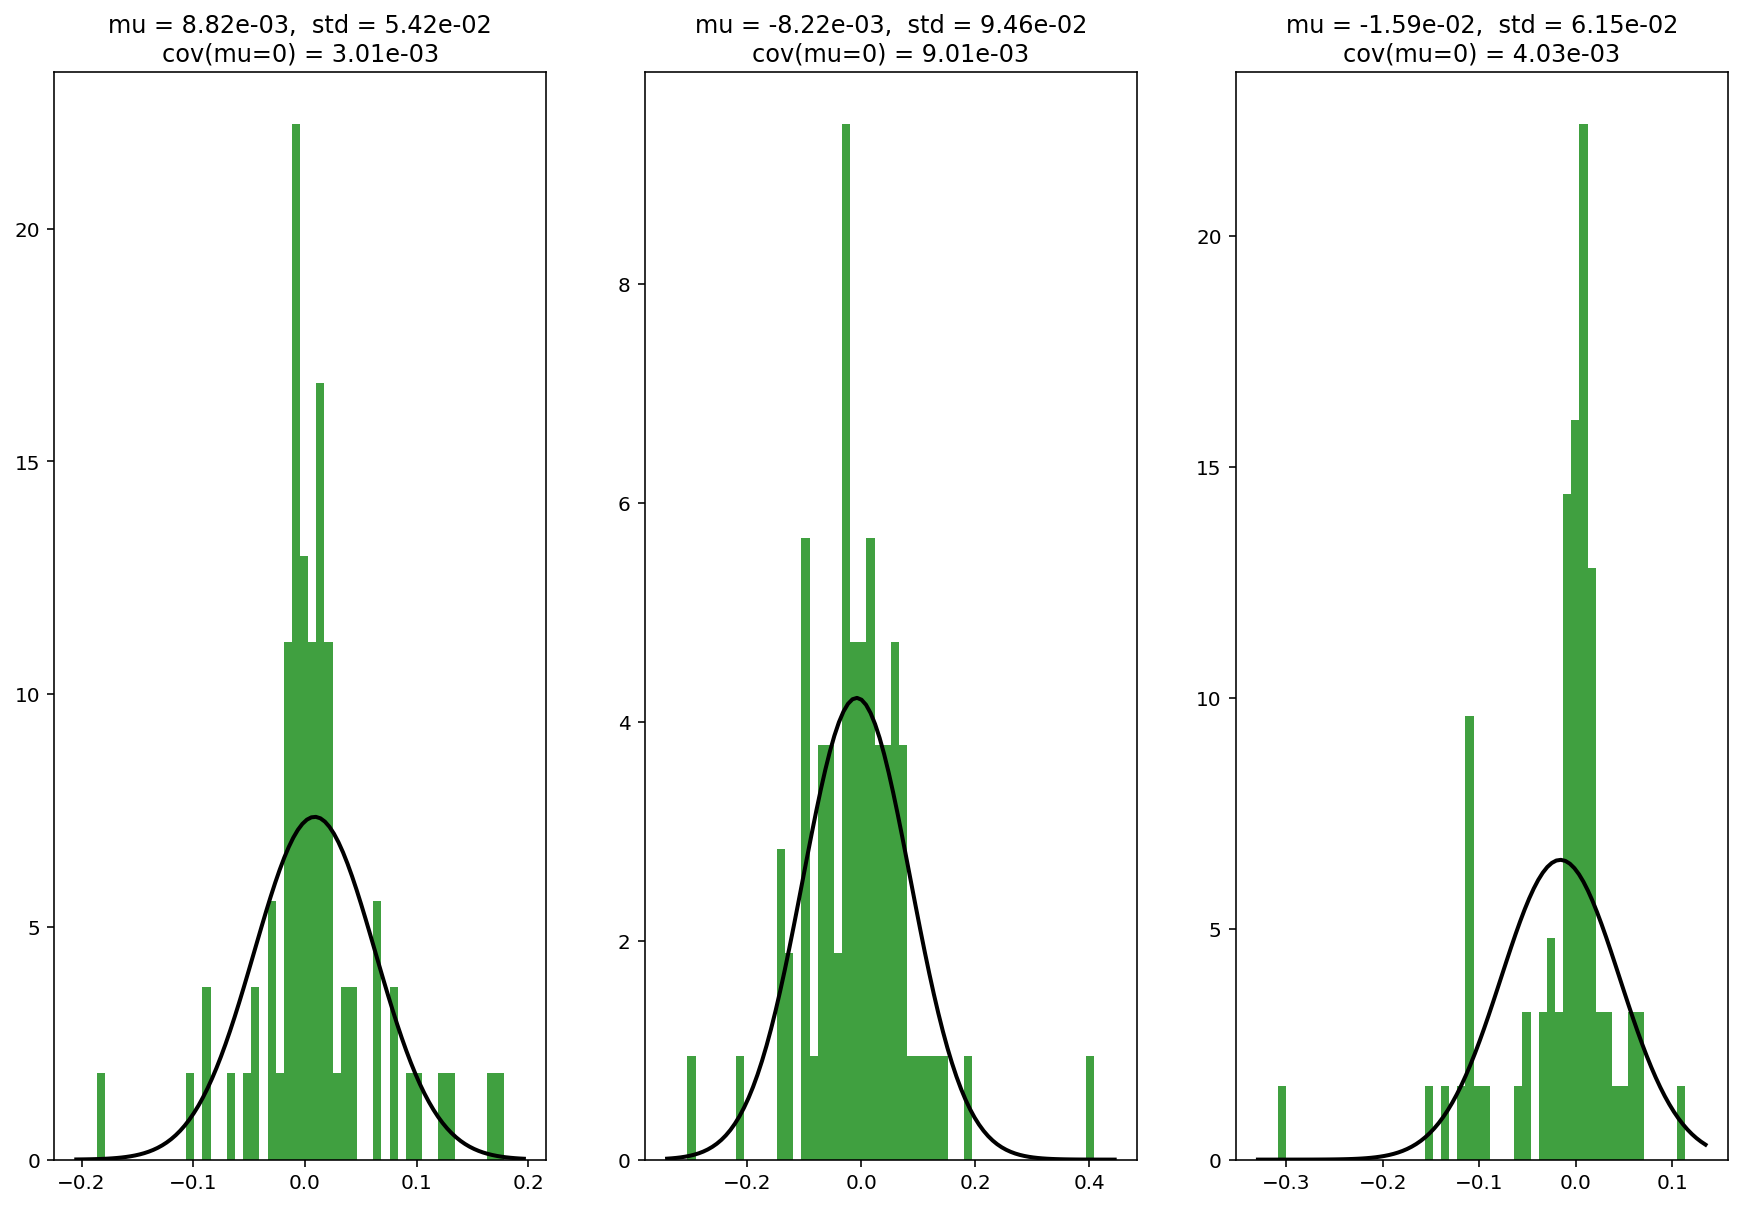

In [31]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
loops = read_loops(bag, t0, "/swarm_loop/loop_connection")
loops_error = plot_loops_error(poses, loops, good_loop_id=inliers[-1], outlier_show_thres=0.4)
#_= debugging_pcm("/home/xuhao/bags/swarm_raw_parallel2_2021-10-18_17-09/outputs/fuse_all/swarm1/", inliers[-1], loops_error, 1.635)

Read distances from topic /swarm_drones/swarm_frame


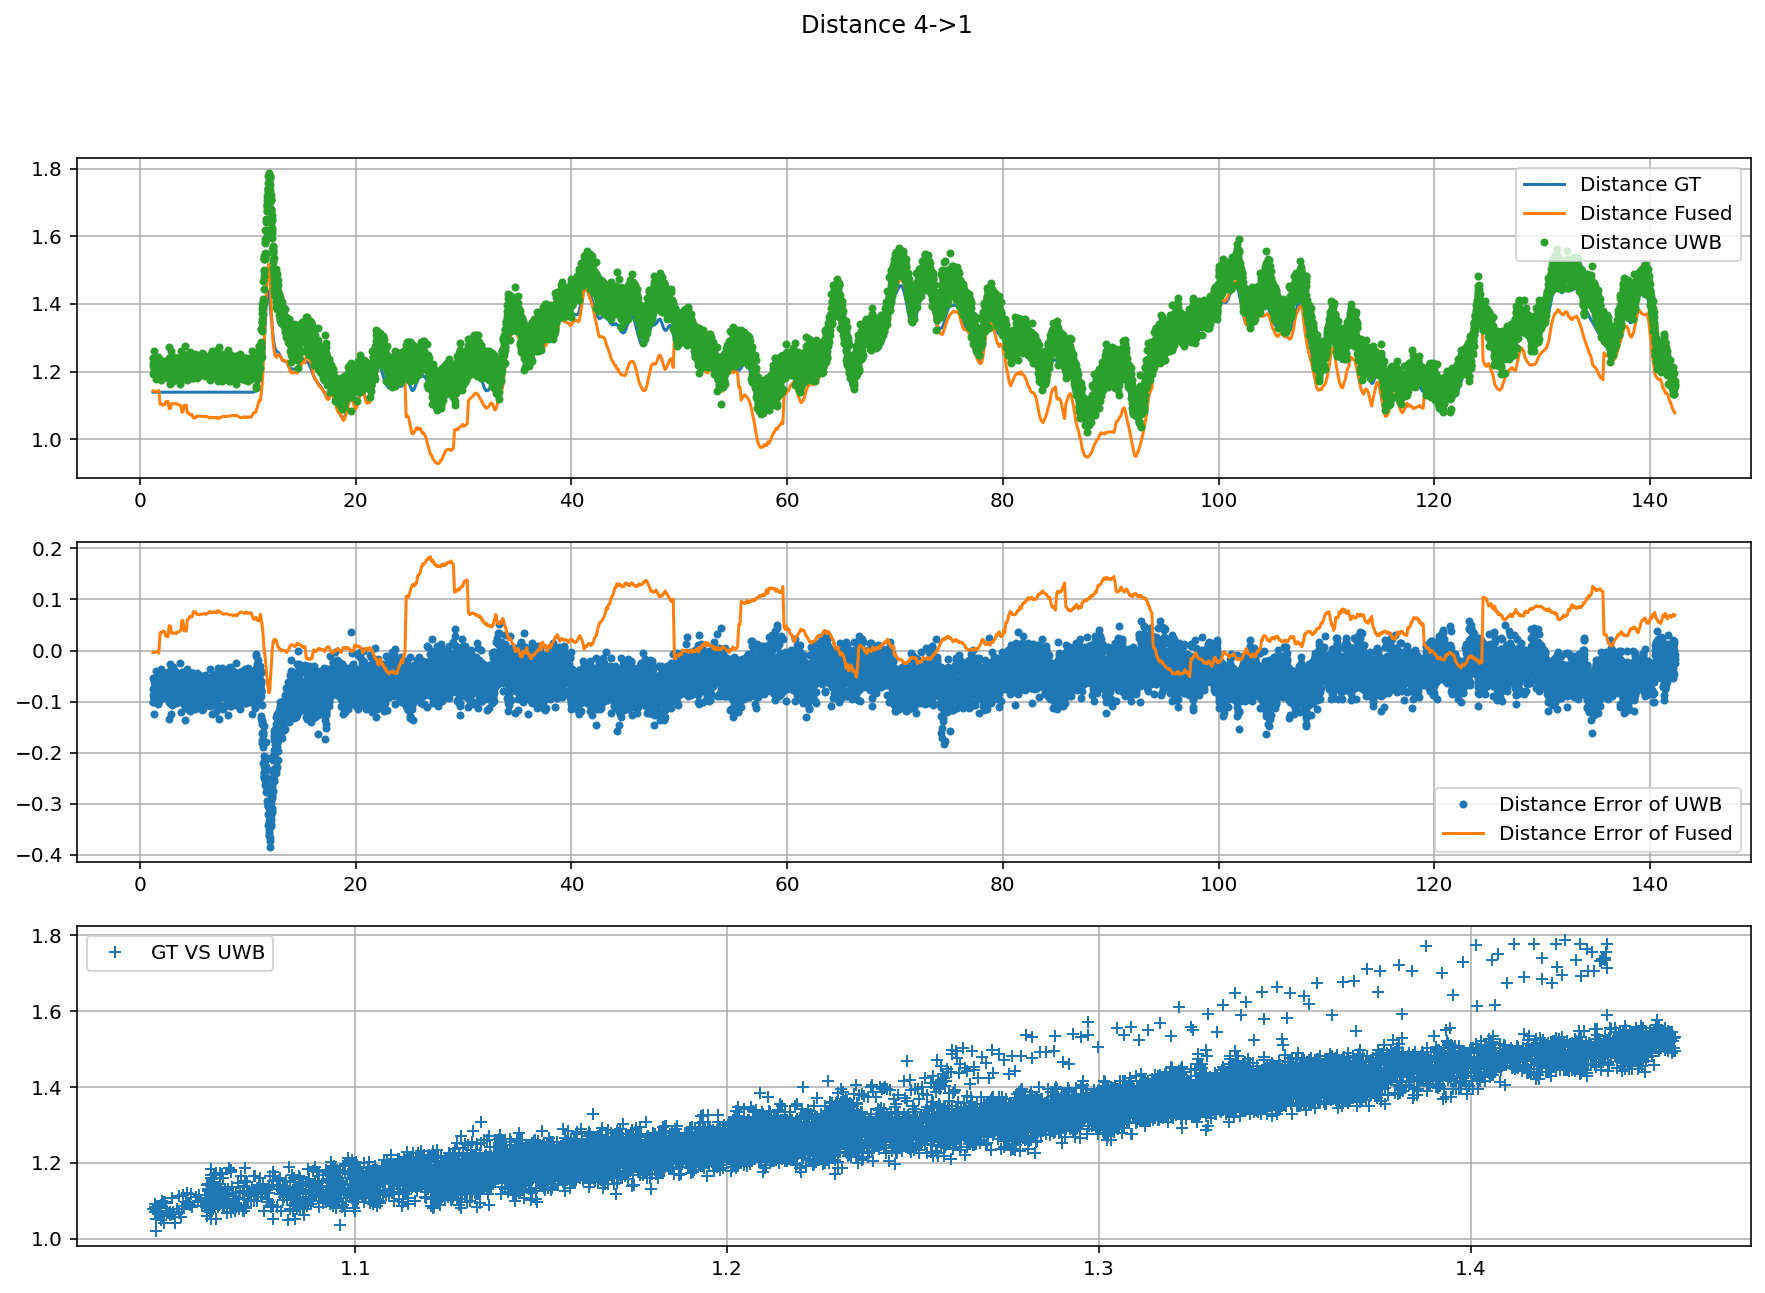

Distance 4->1 RMSE 0.06520451825318099
Fit 0.8466392689730007, 0.14620570391720963


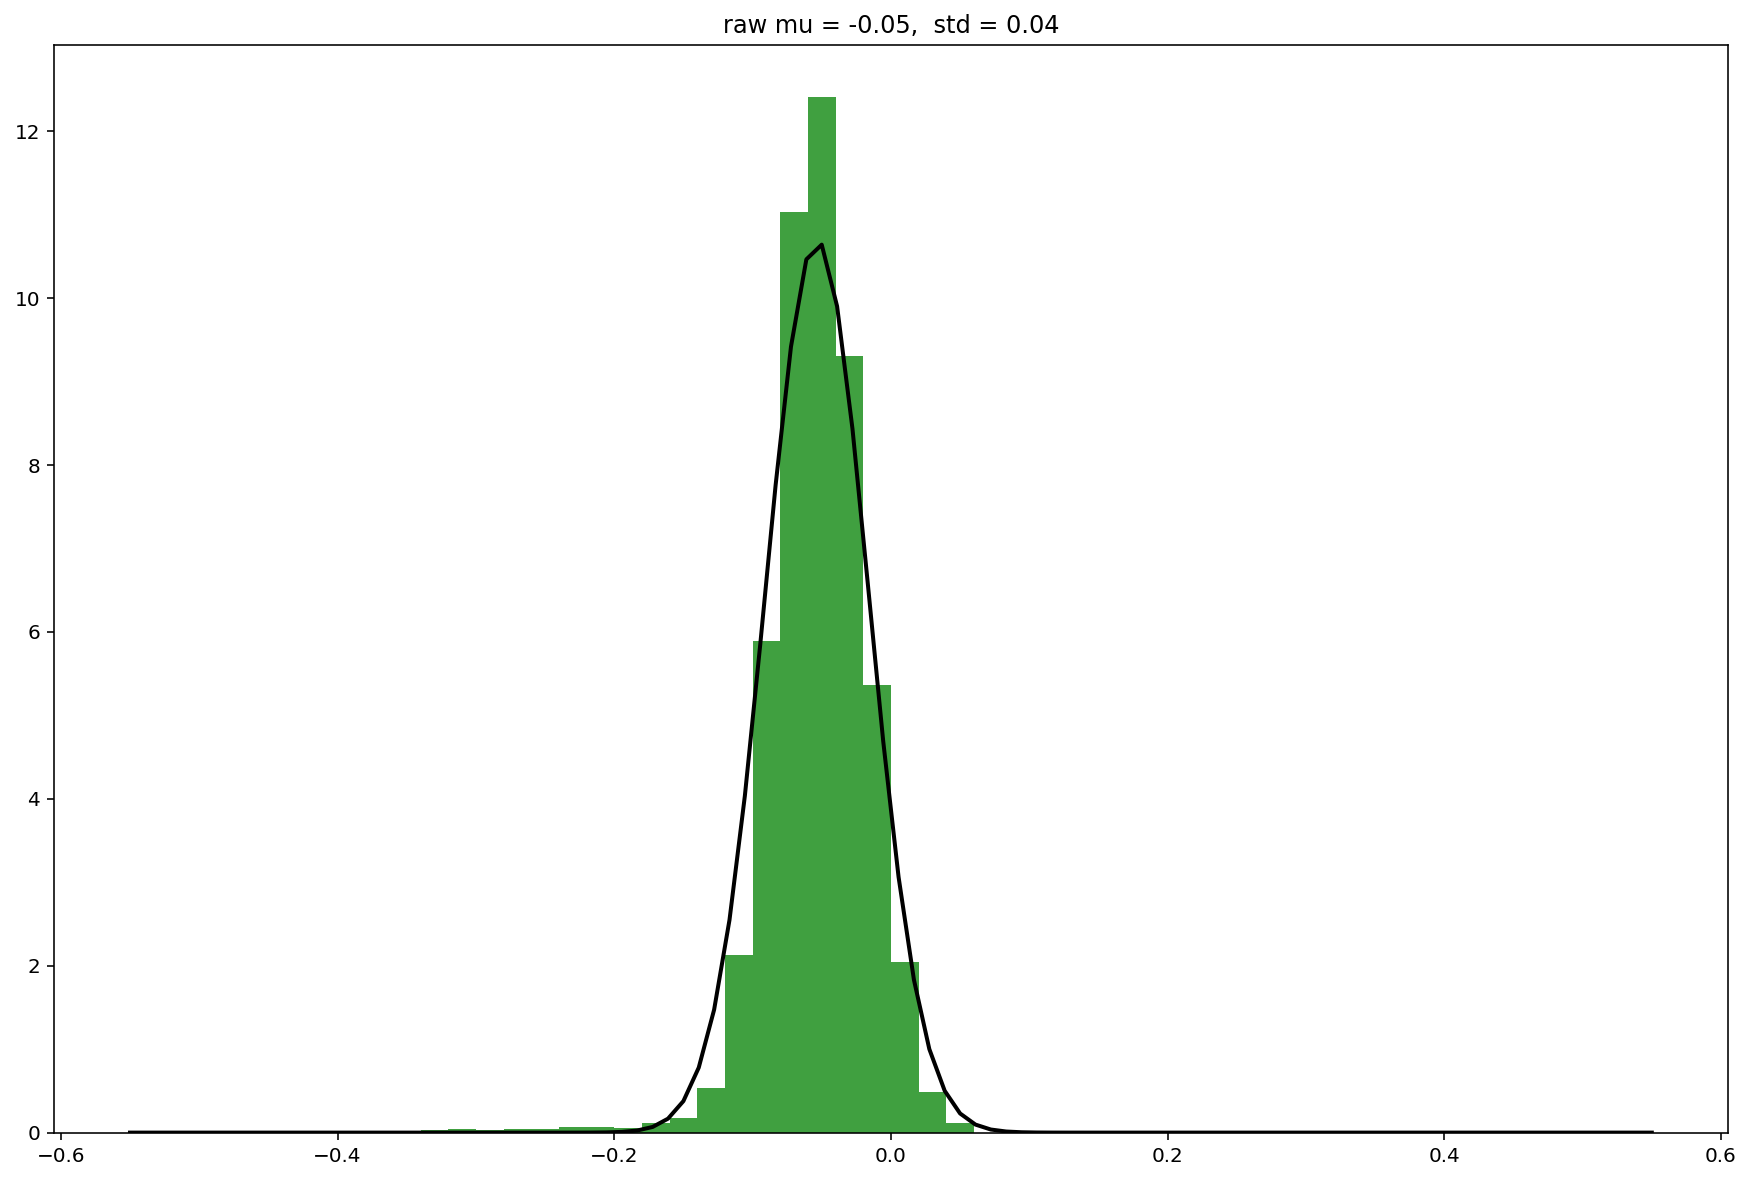

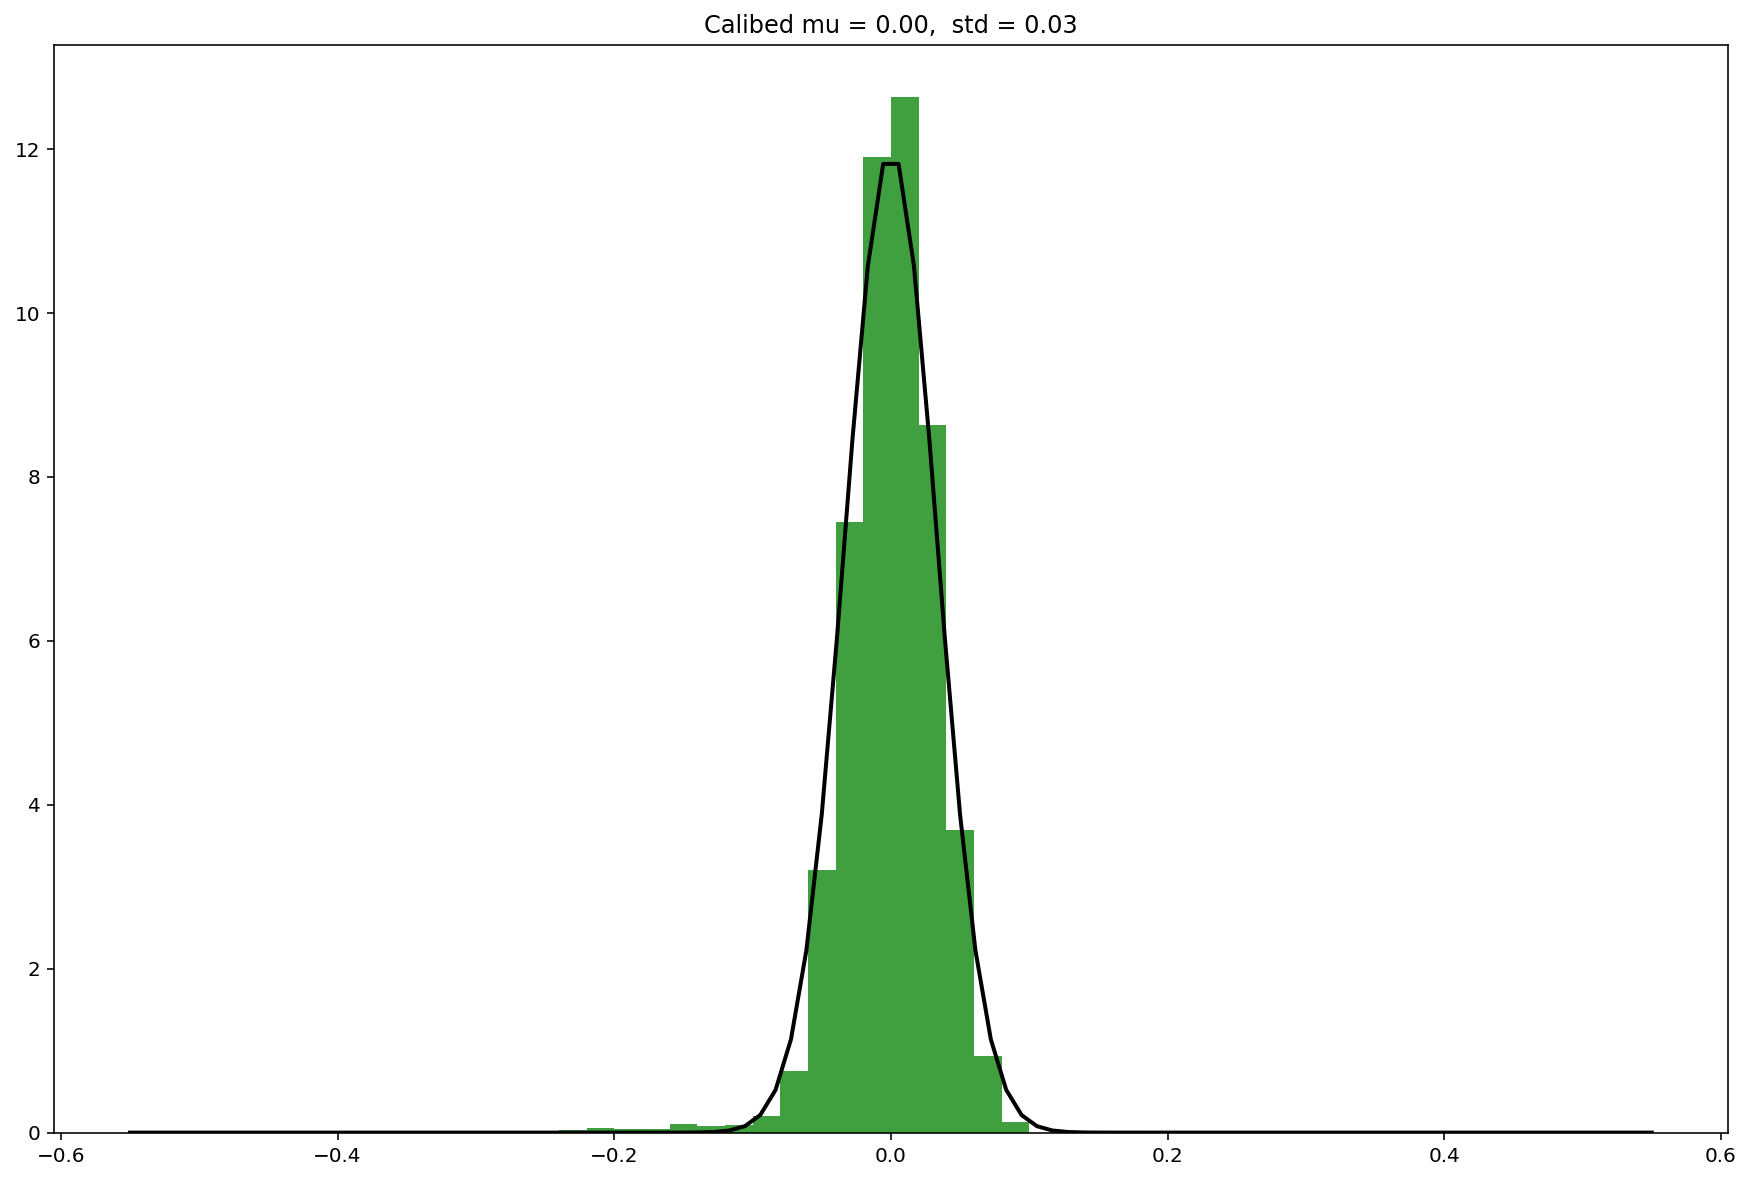

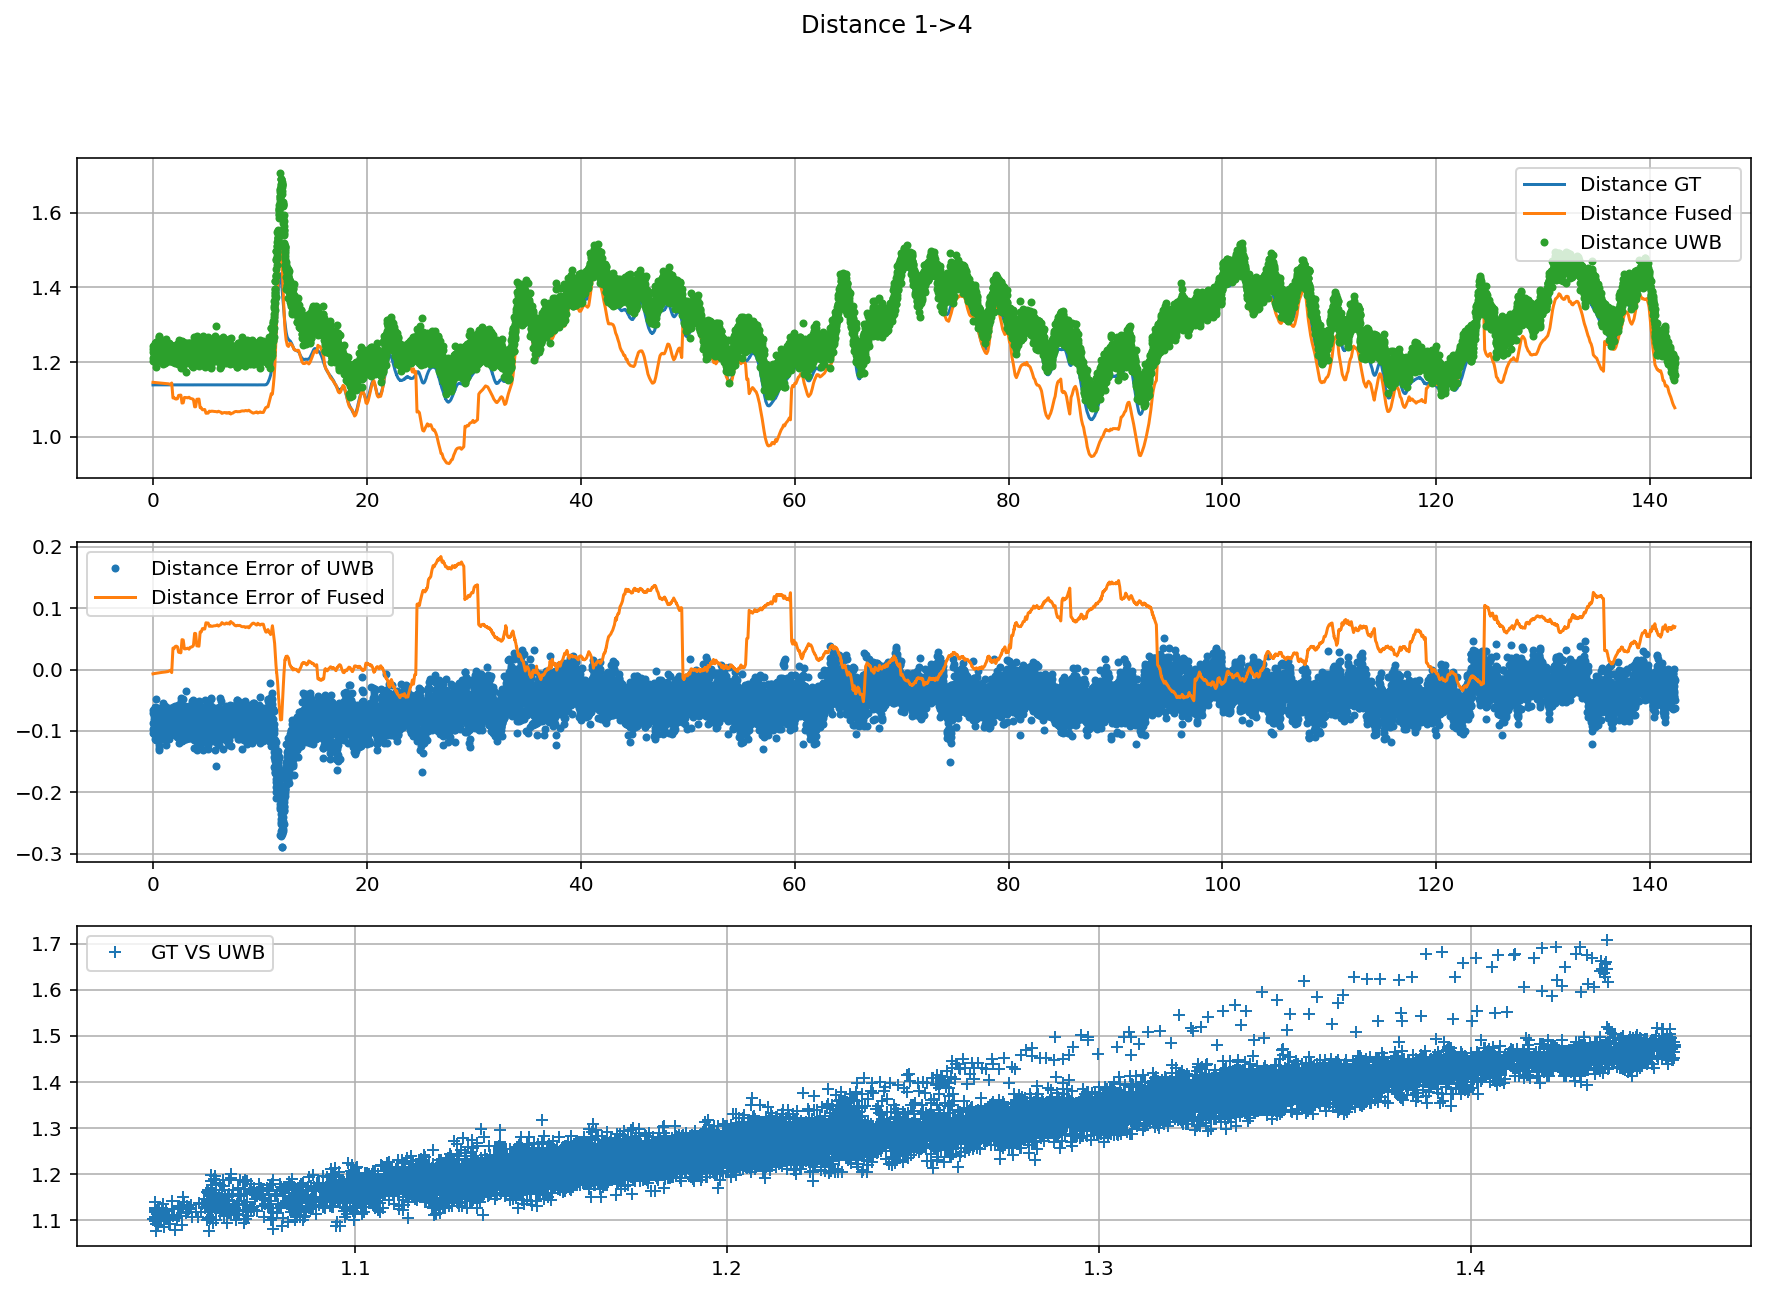

Distance 1->4 RMSE 0.060311321568587935
Fit 1.0243085342687634, -0.08227464932799301


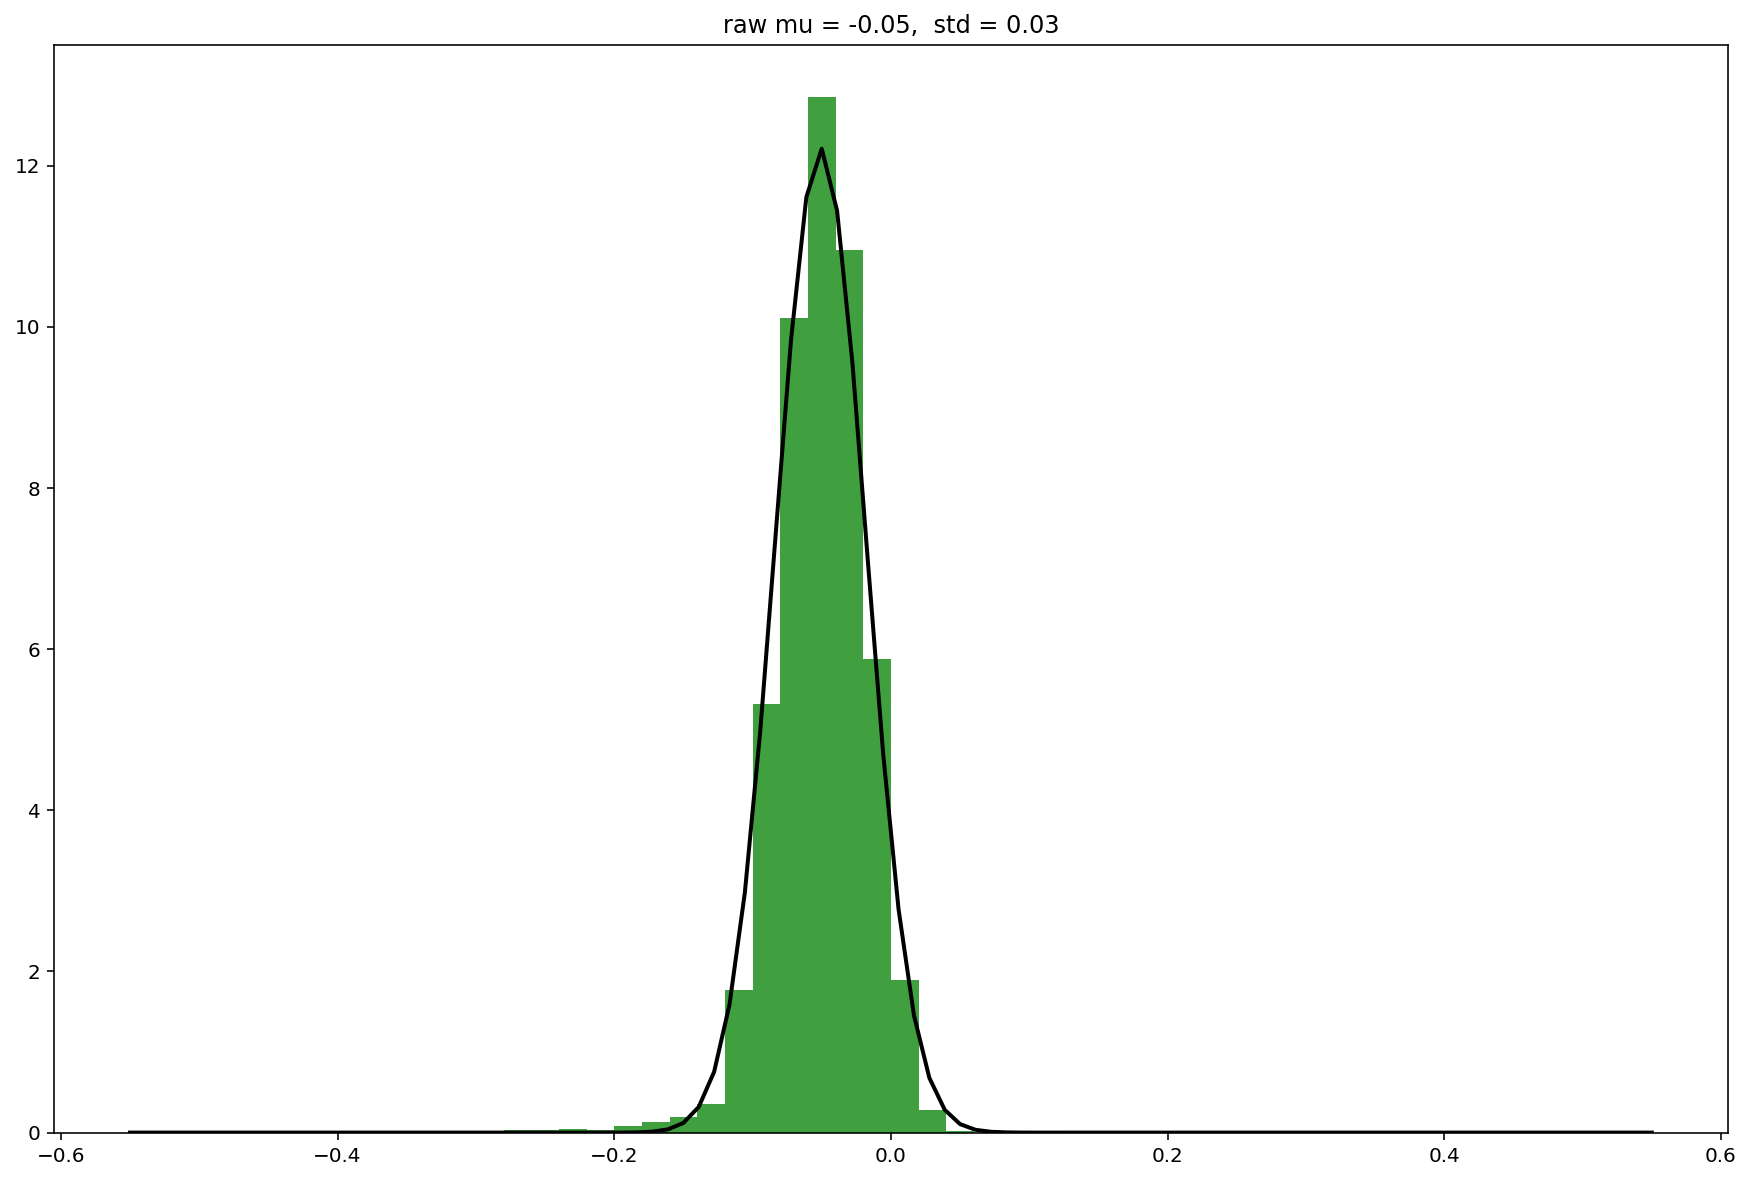

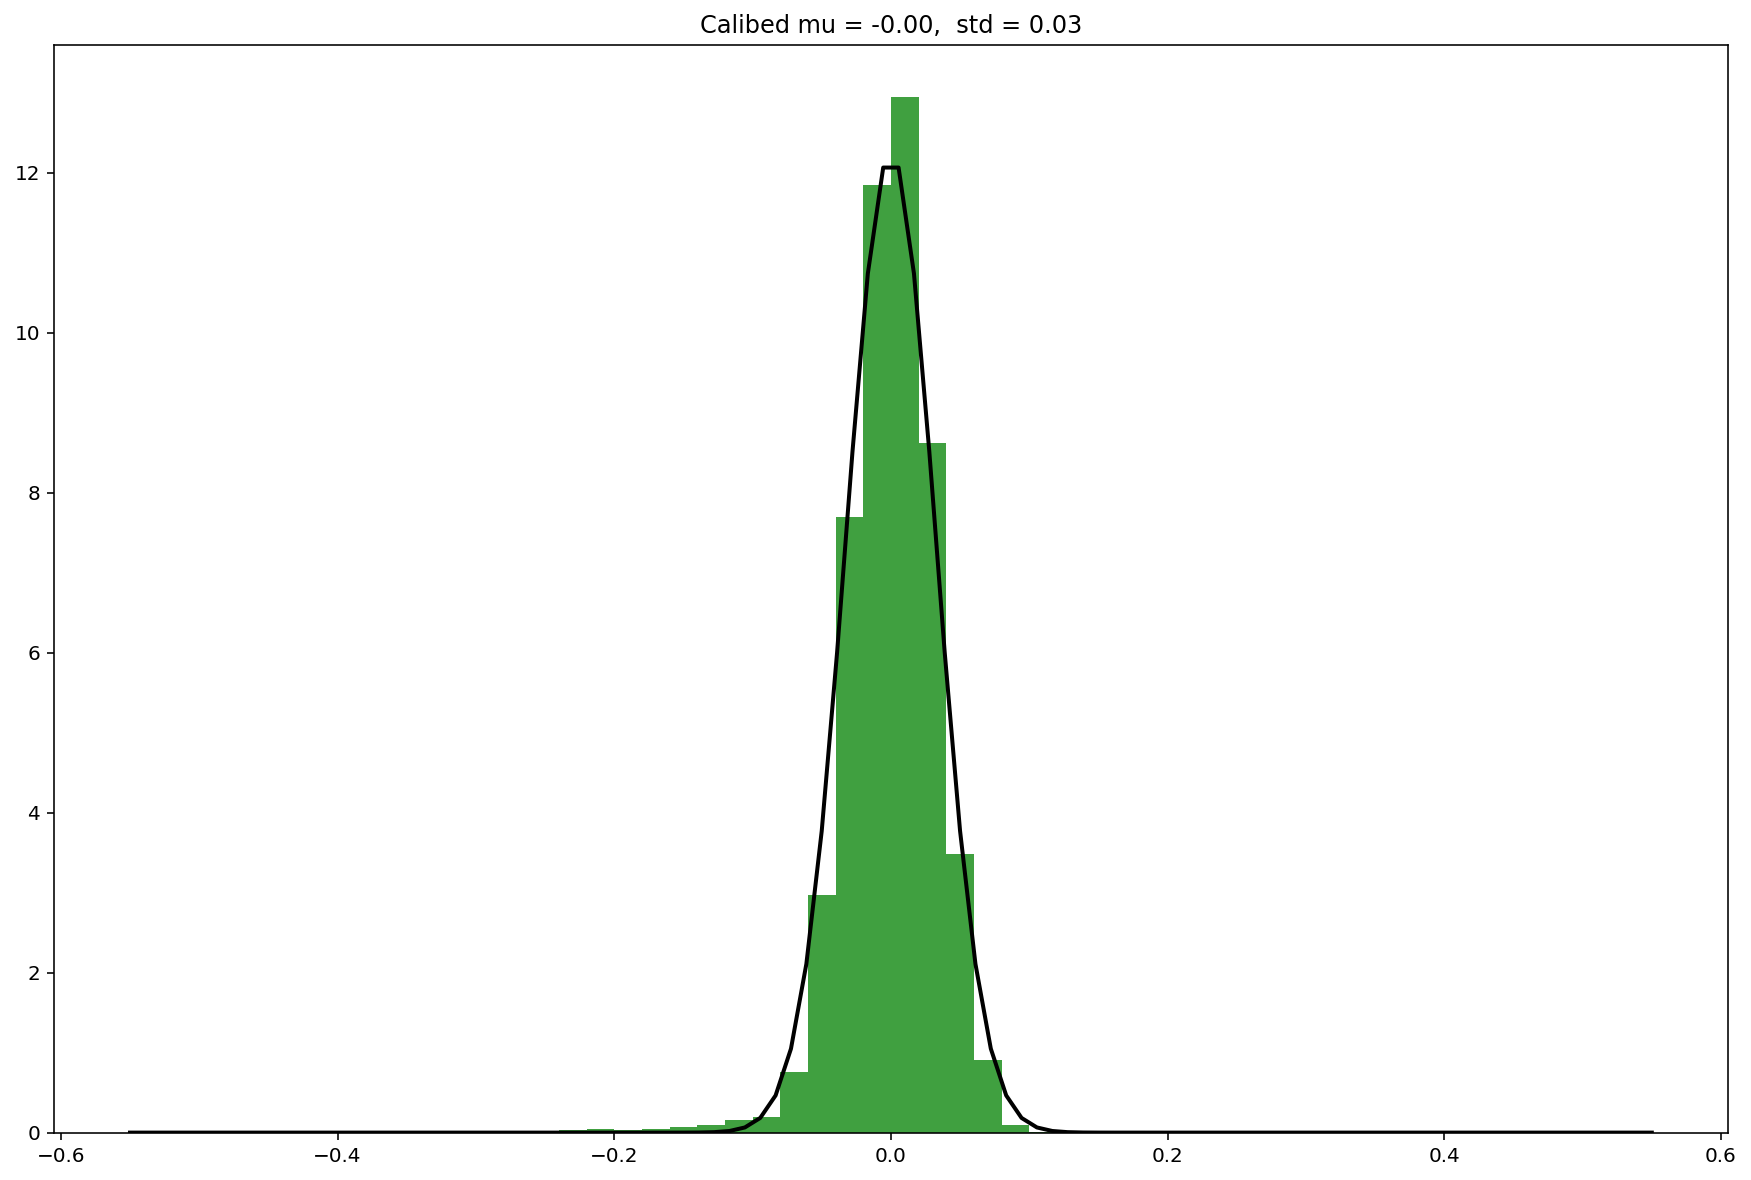

In [17]:
plt.close("all") 
distance_calib = {
    1: {}
}
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)

plot_distance_err(poses, poses_fused, distances, main_id, nodes, distance_calib[main_id], is_show=True)

Outlier rate 0.00% total loops 70 inter_loops 108 outlier_num 0
Pos cov 1.1e-03, 2.5e-03, 9.0e-04
Yaw cov 3.1e-03
Pos std 3.3e-02, 5.0e-02, 3.0e-02
Yaw std 5.6e-02


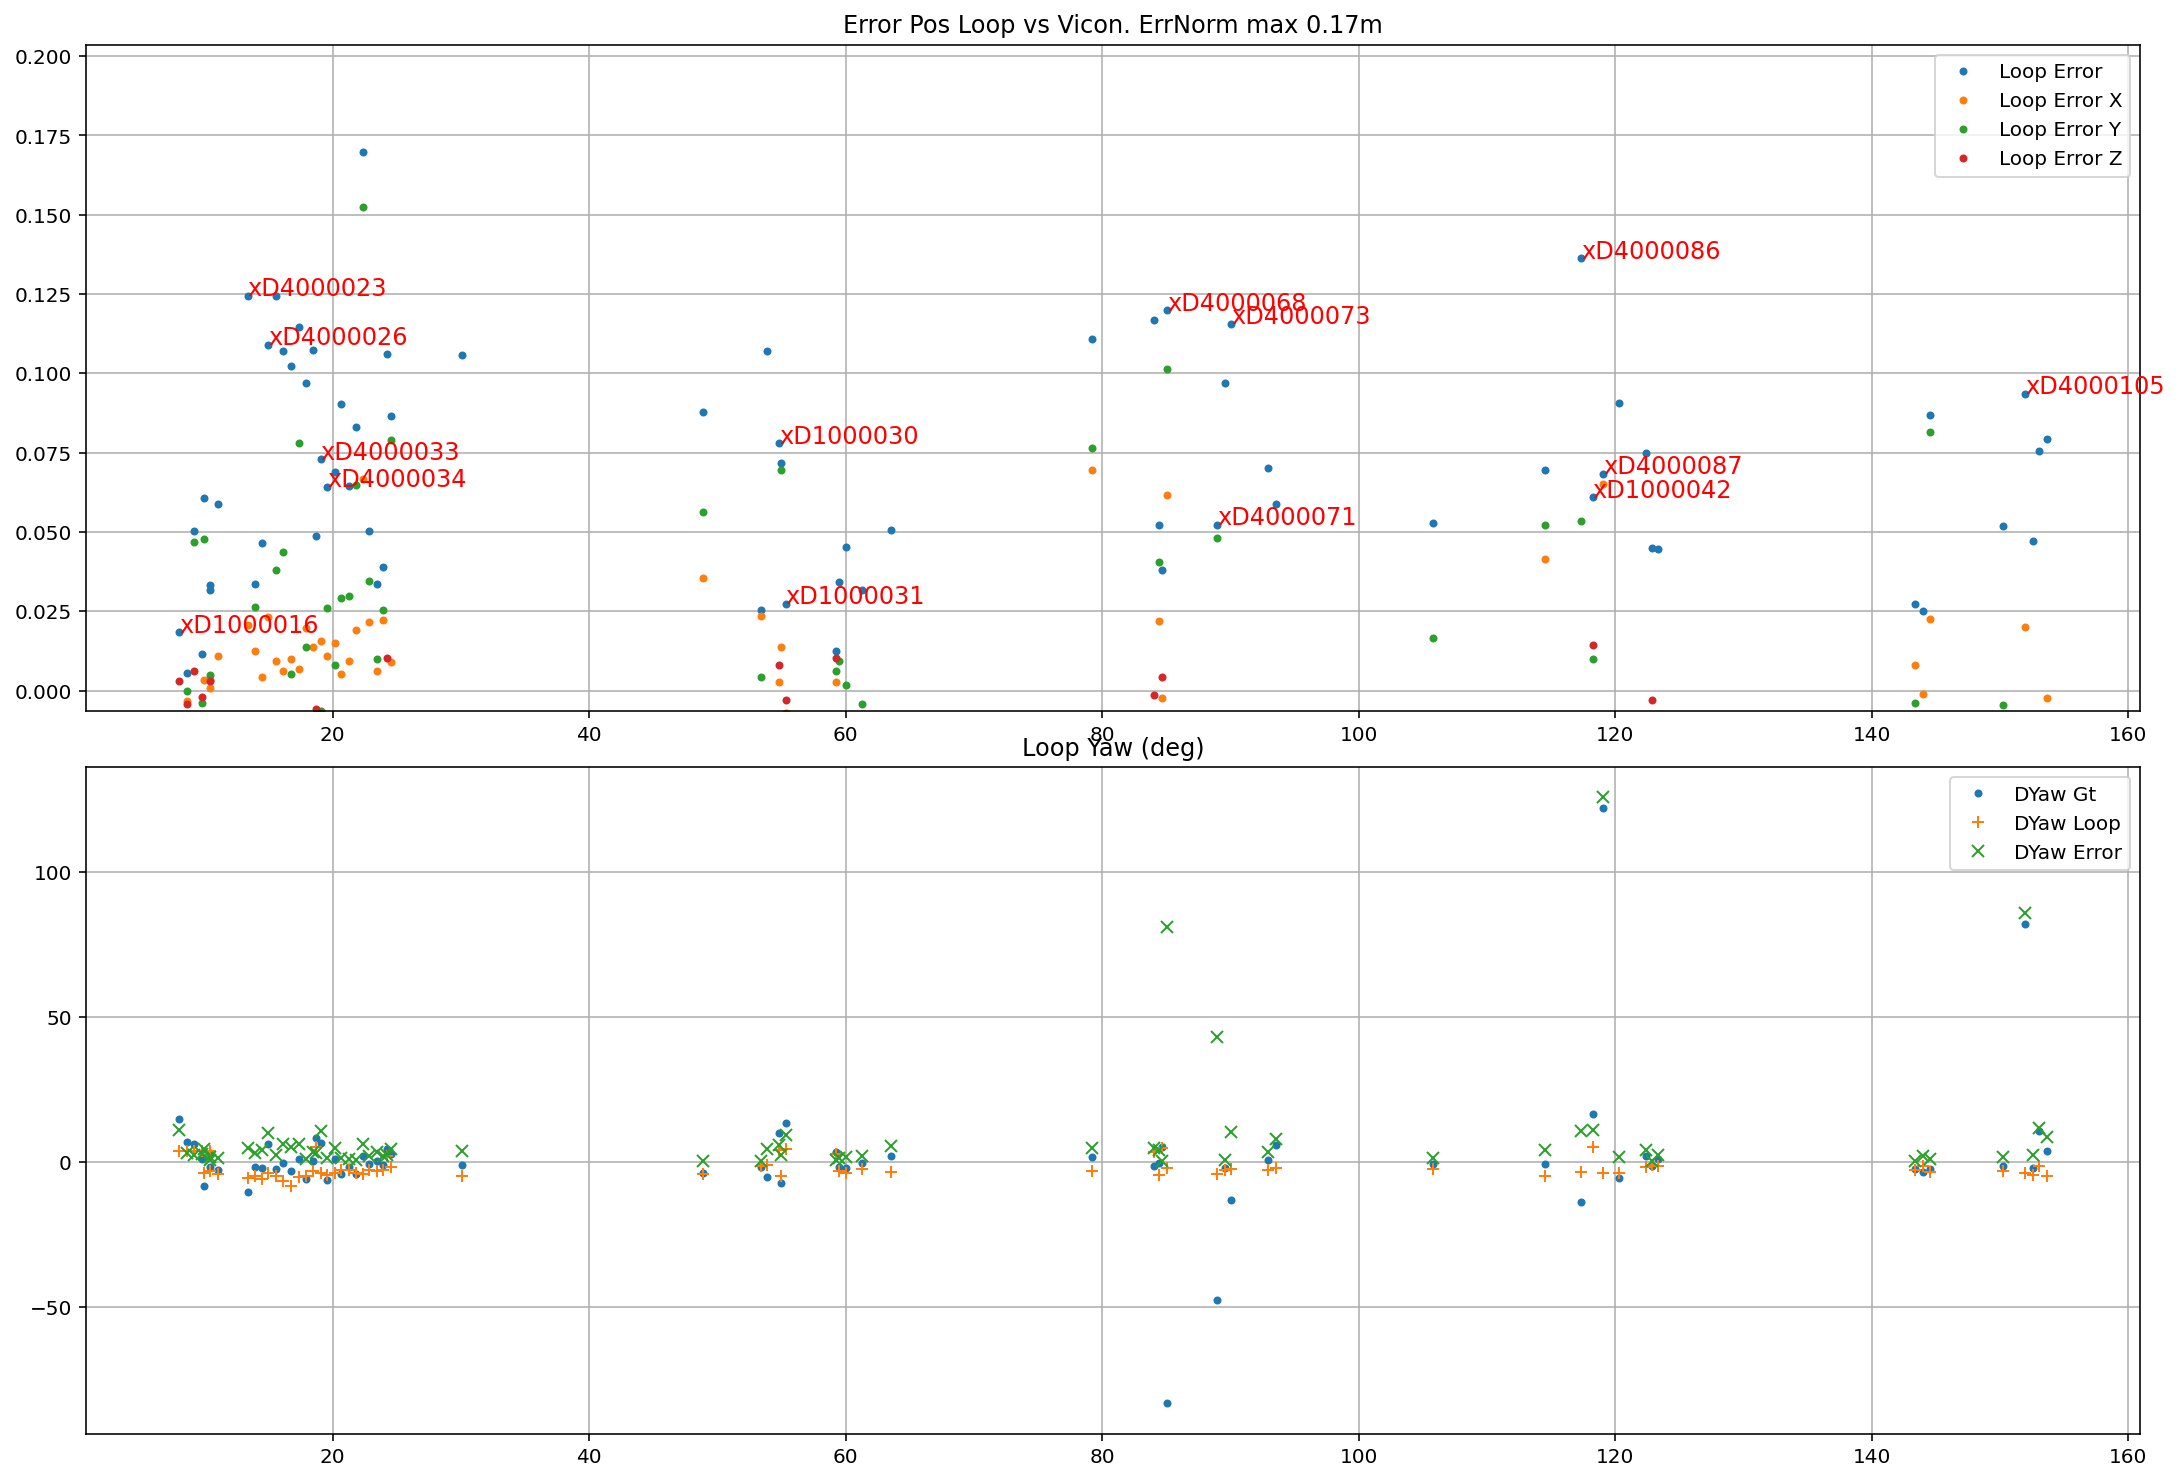

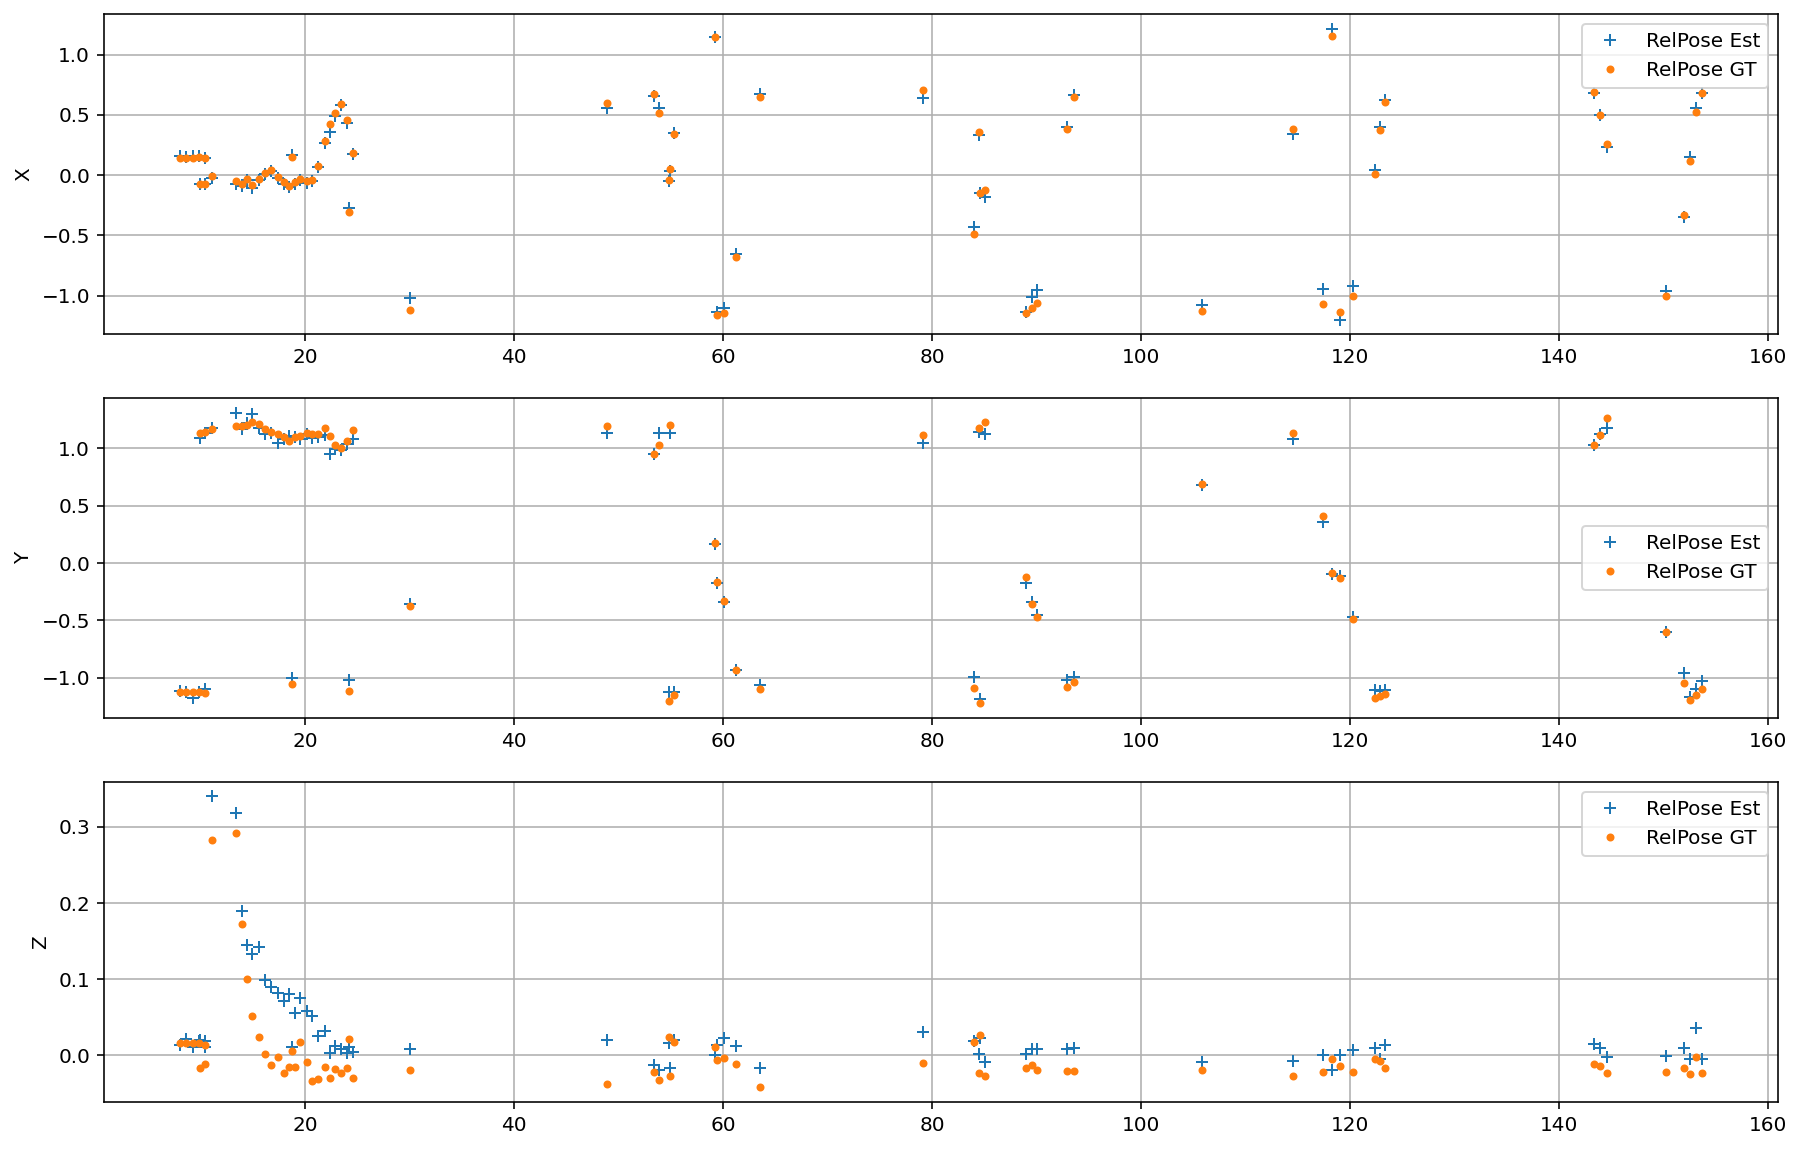

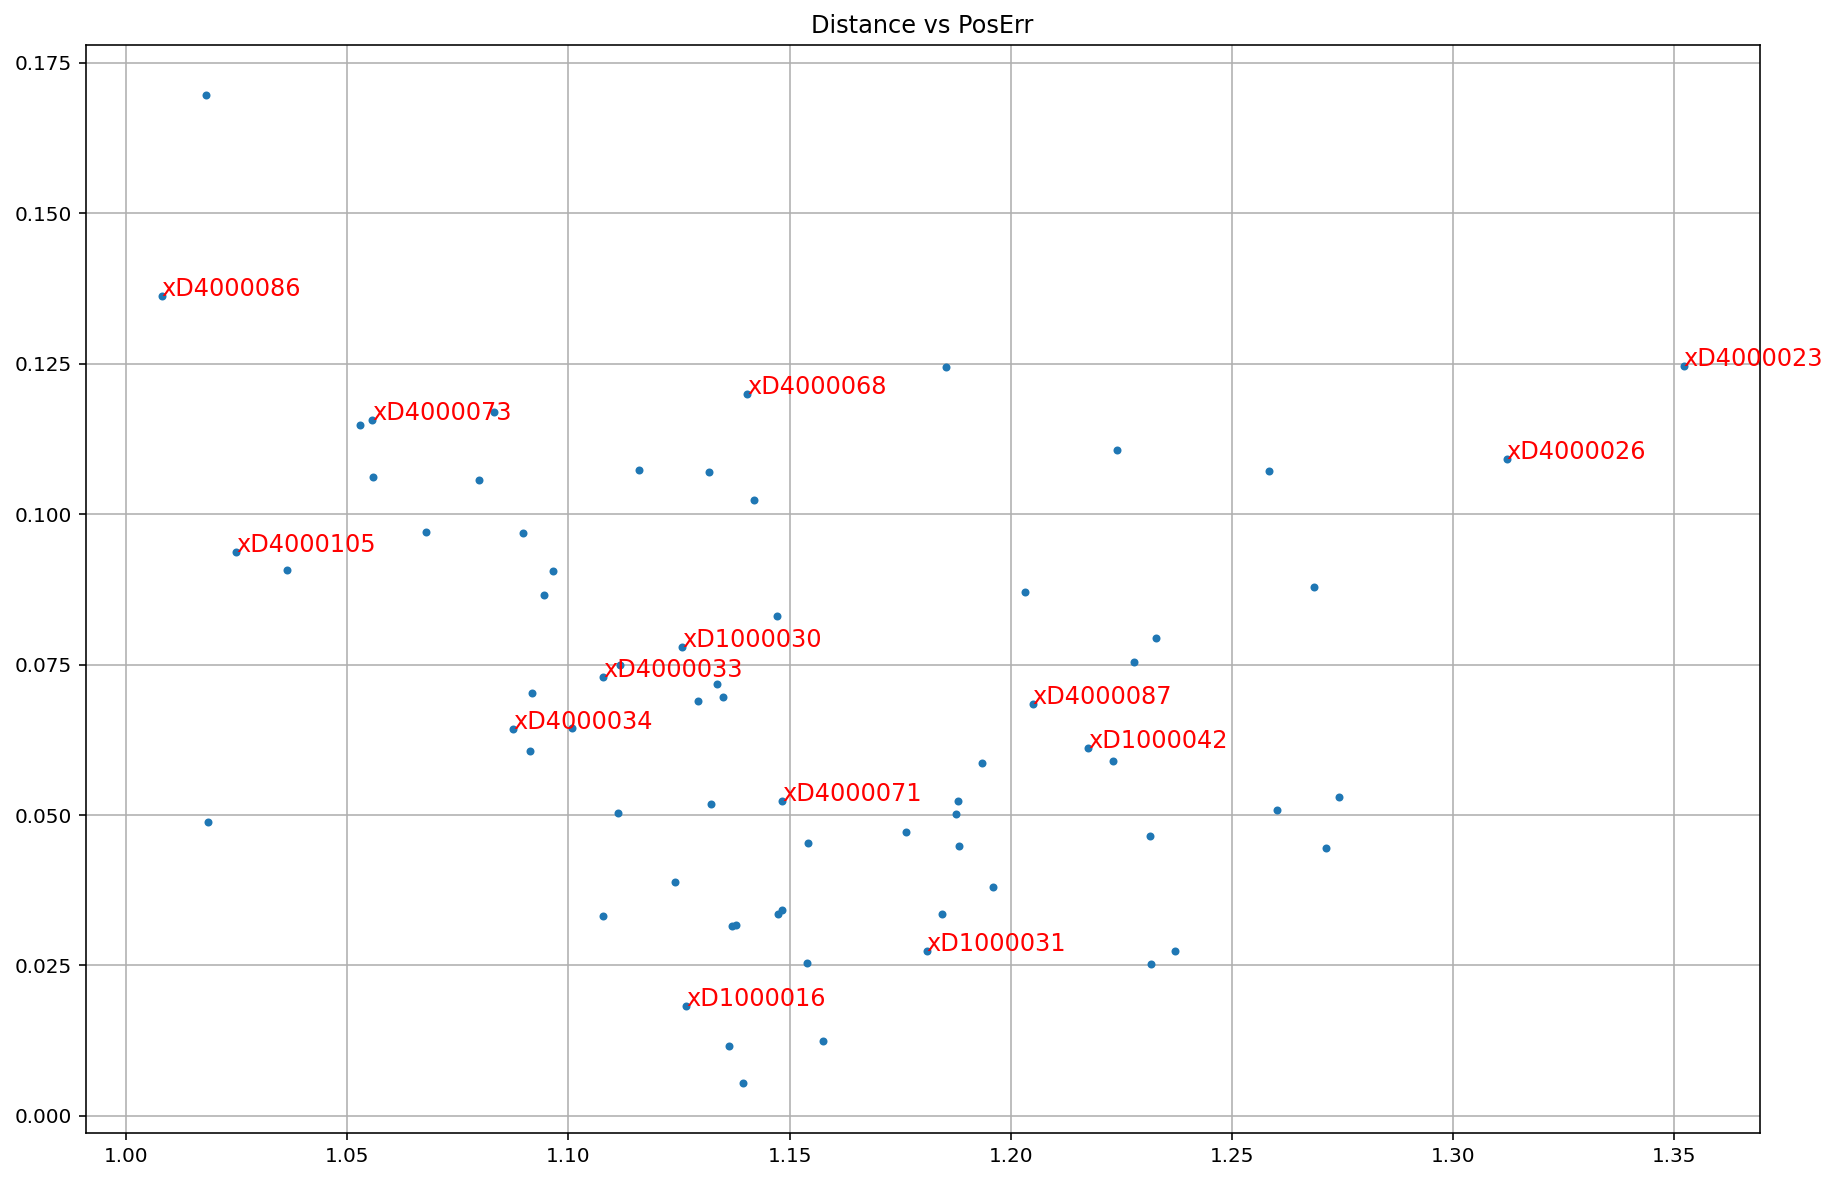

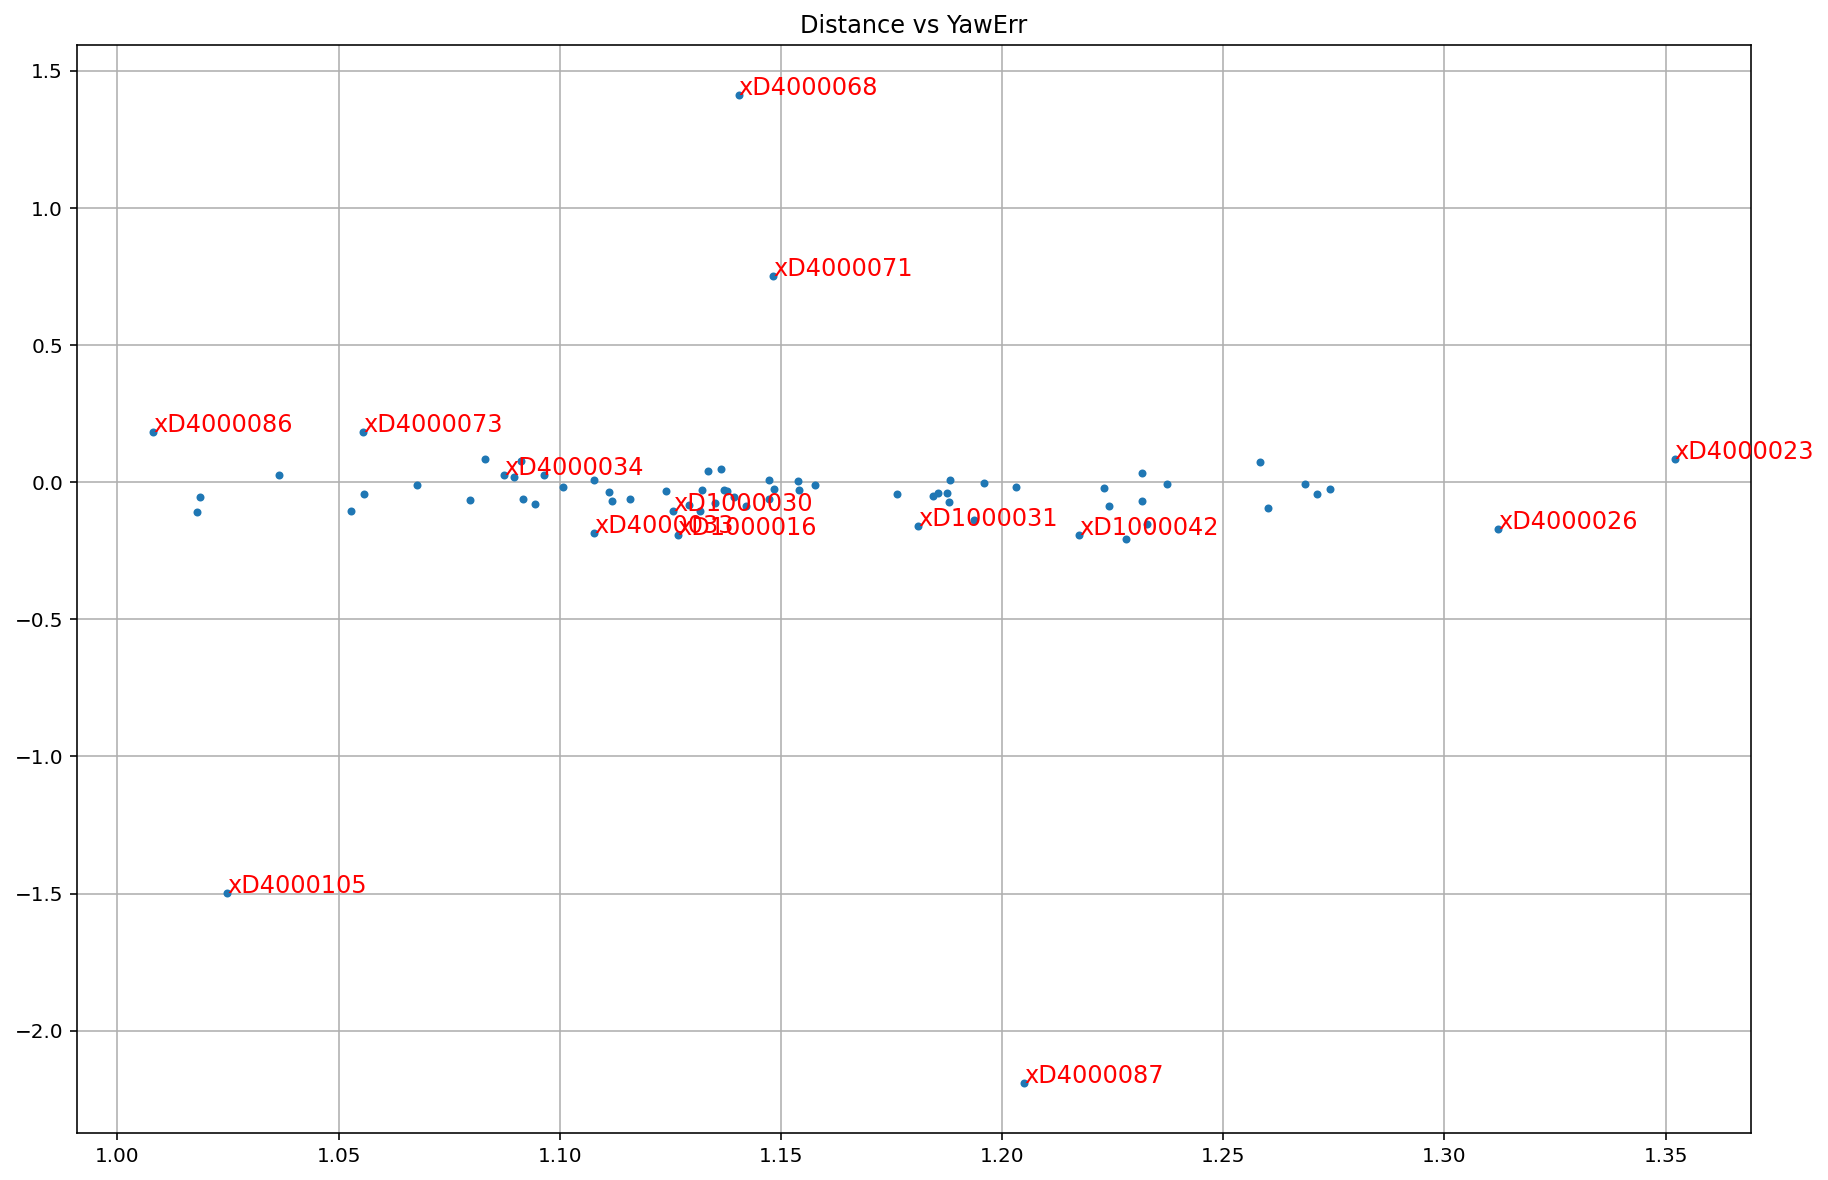

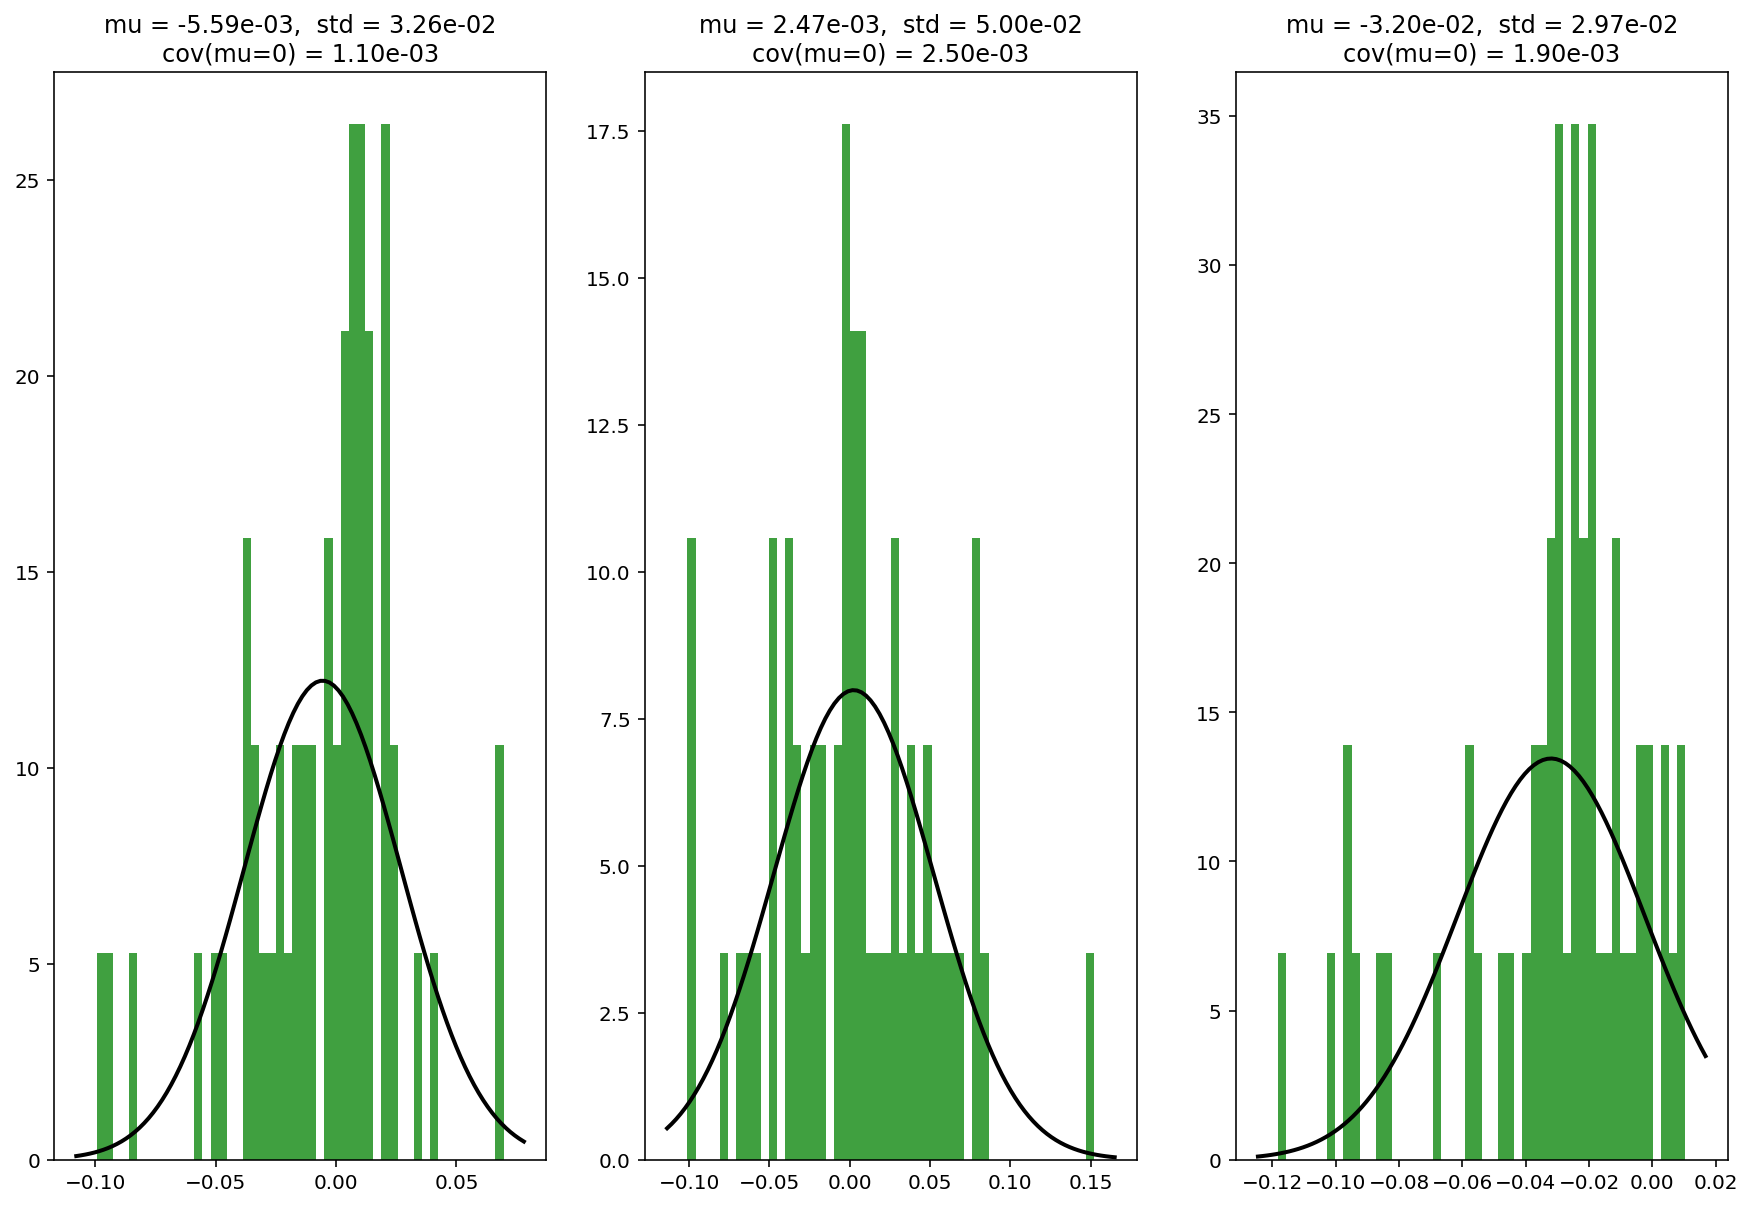

In [24]:
plt.close("all")
inliers = read_loop_inliers(bag, "/swarm_drones/loop_inliers")
detections = read_detections_6d(bag, t0, "/swarm_drones/node_detected_6d")
loops_error =  plot_loops_error(poses, detections, inliers[-1])
# loops_error =  plot_loops_error(poses, detections, None)


Read distances from topic /swarm_drones/swarm_frame


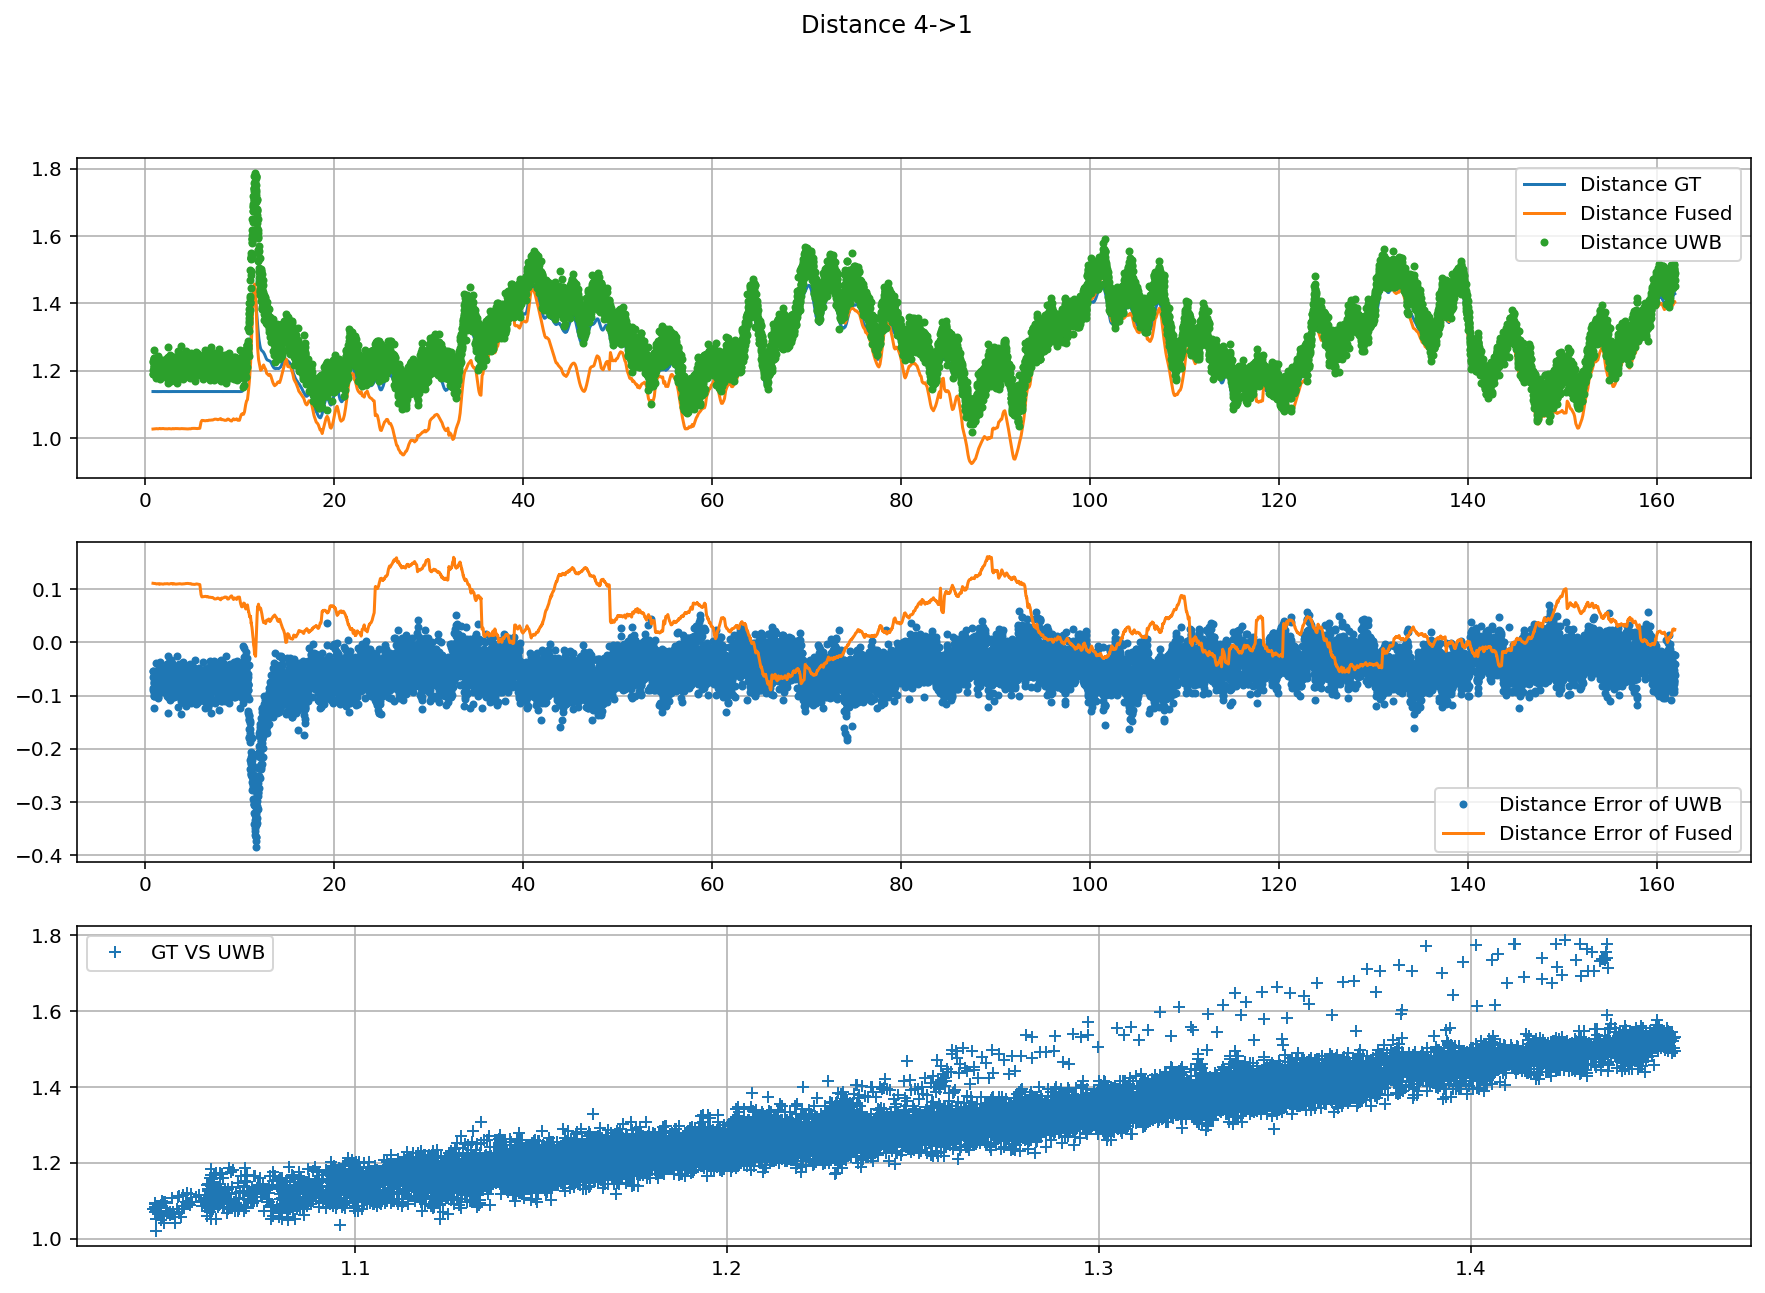

Distance 4->1 RMSE 0.0628697025703948
Fit 0.8440174057374332, 0.15163189862911738


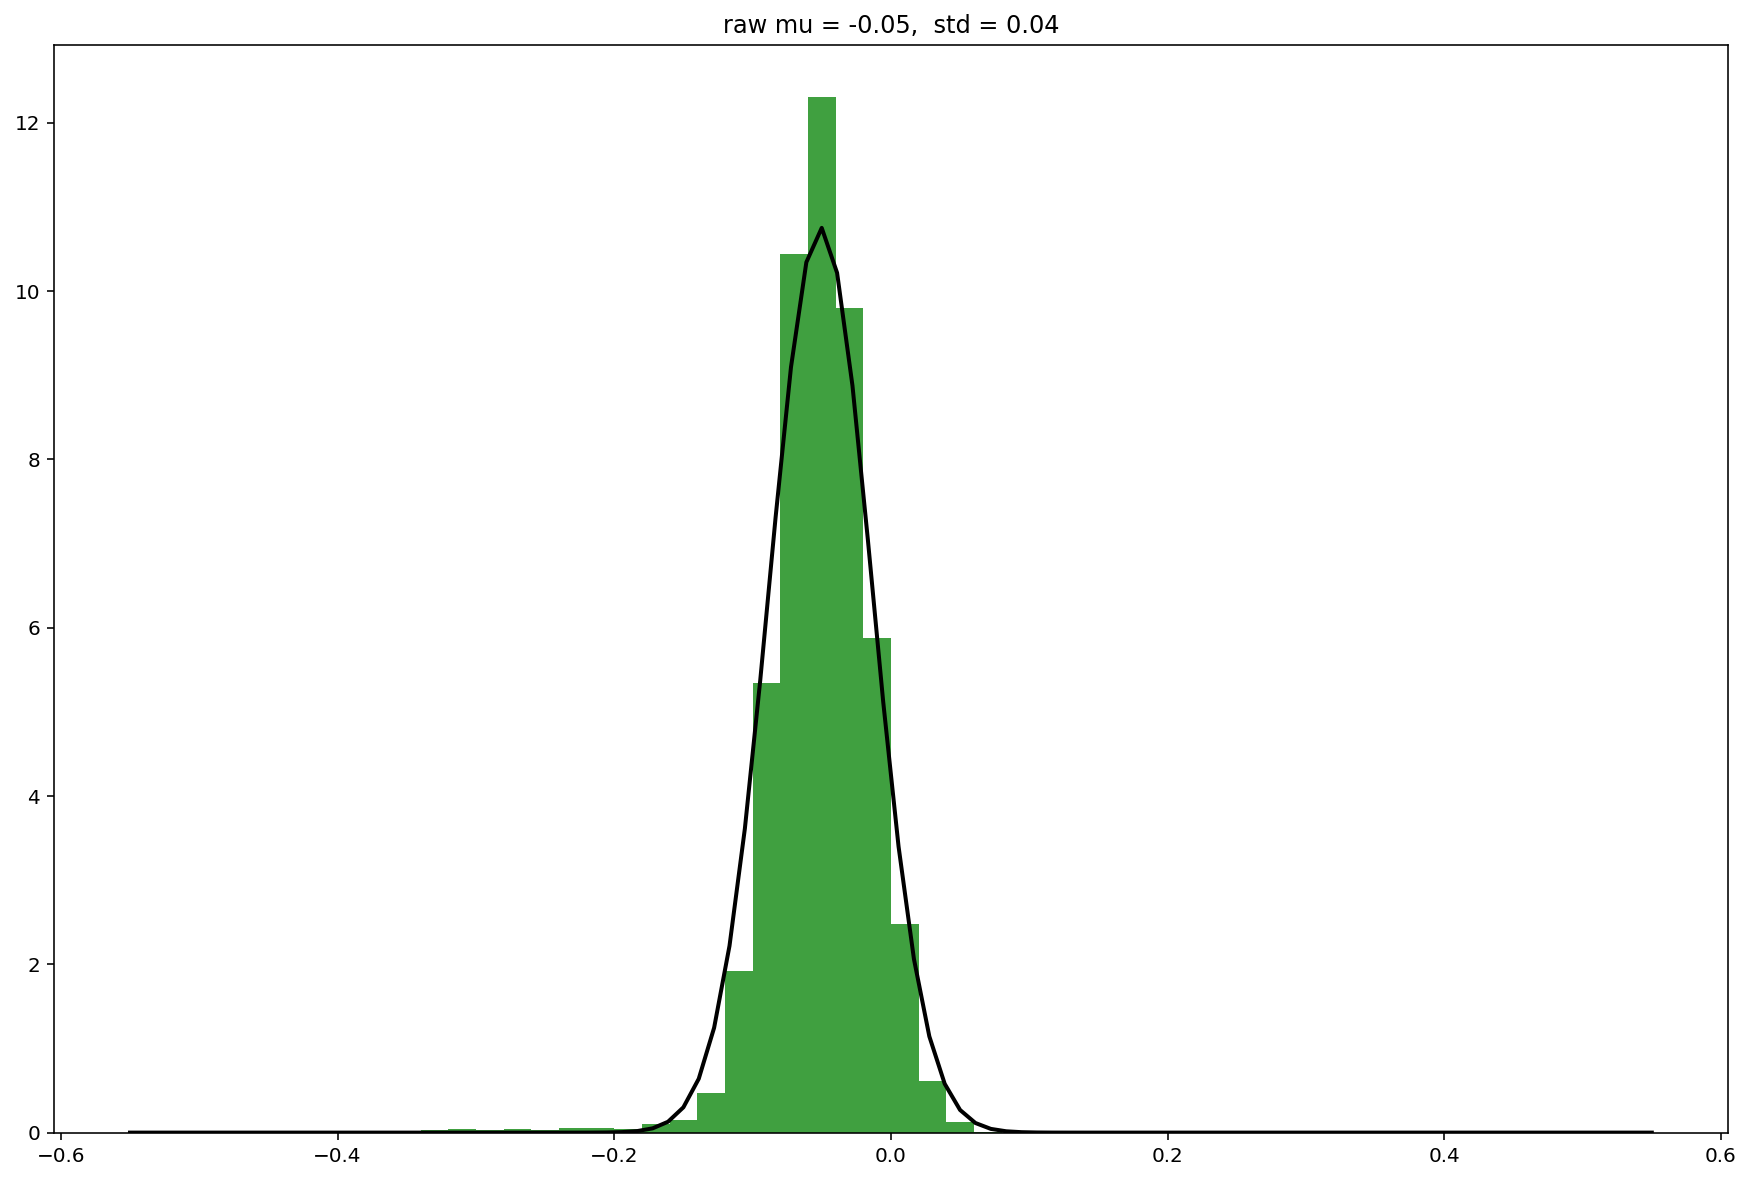

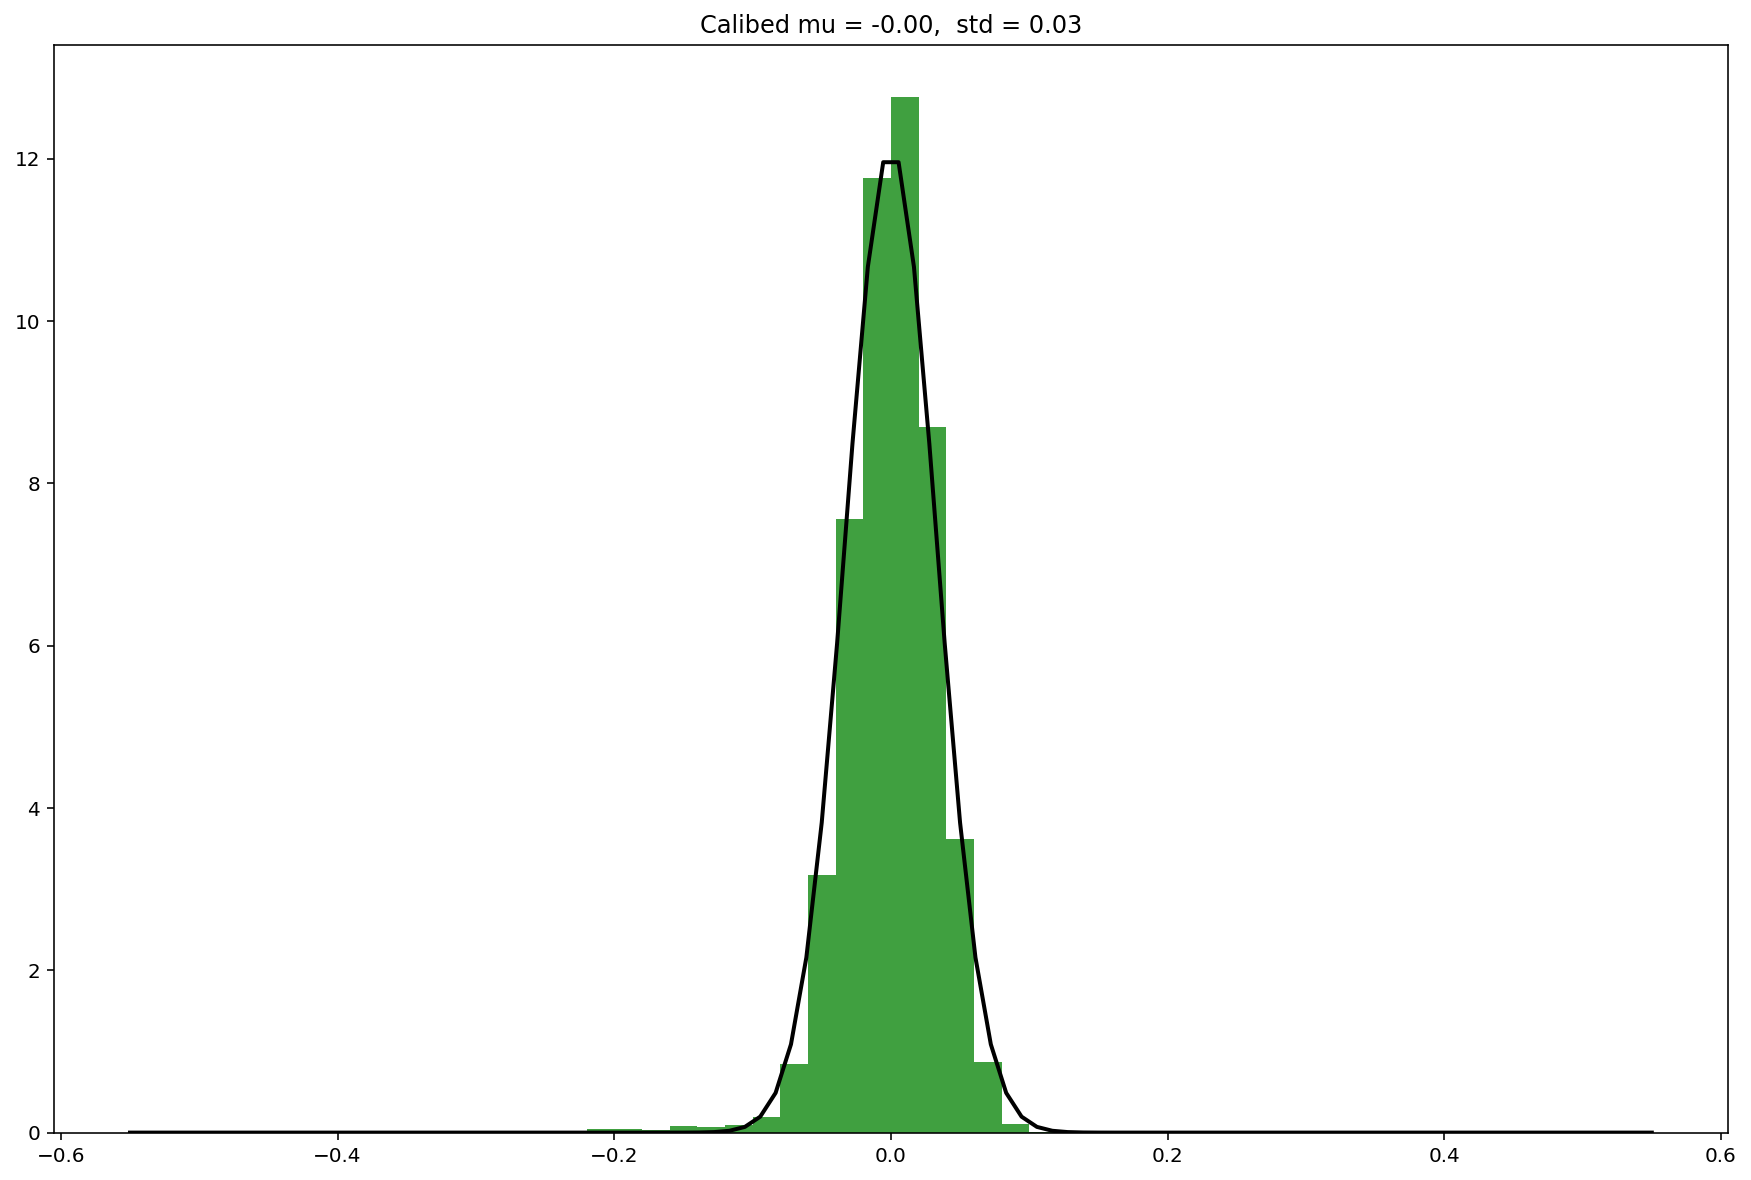

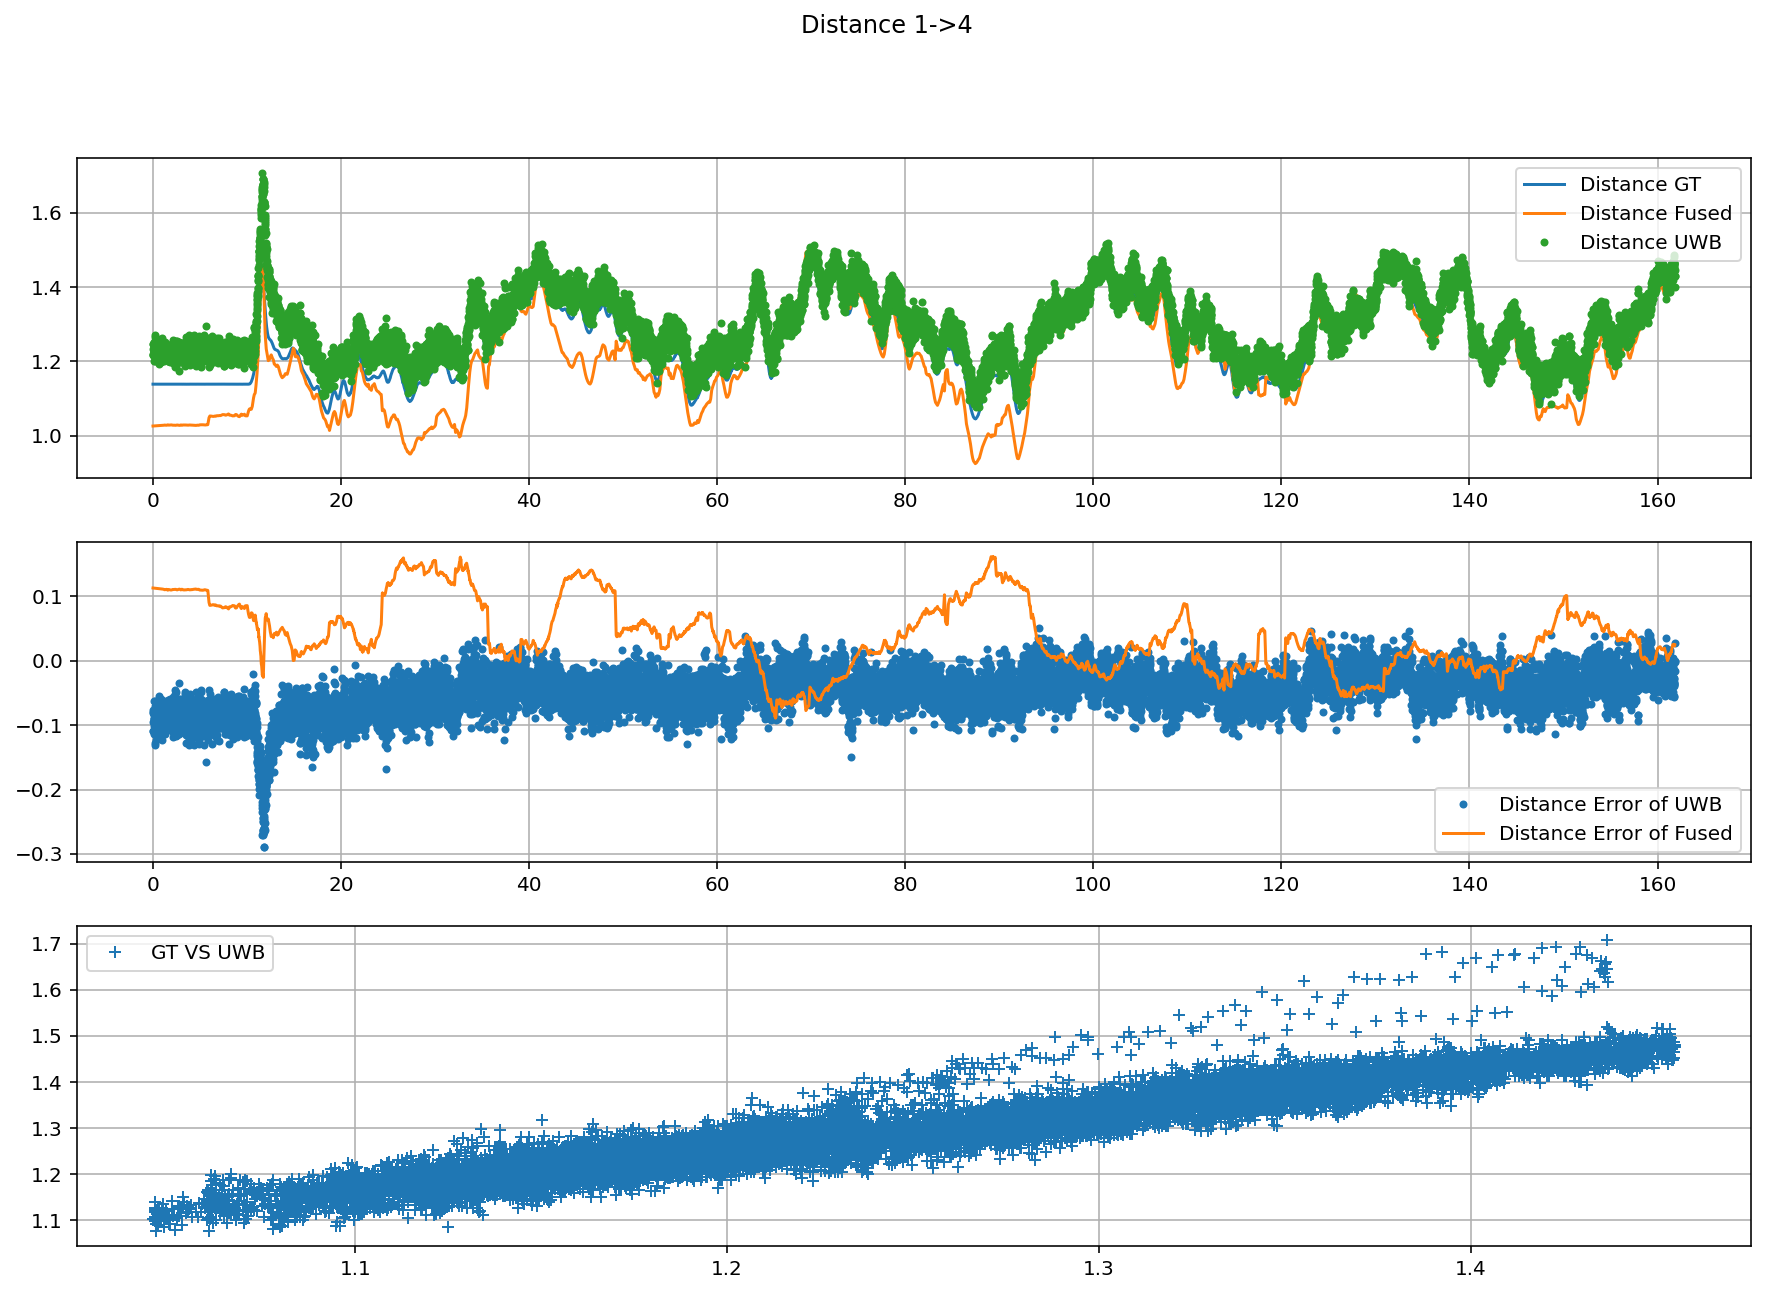

Distance 1->4 RMSE 0.05835329108566988
Fit 1.0192649701033516, -0.0735639591647252


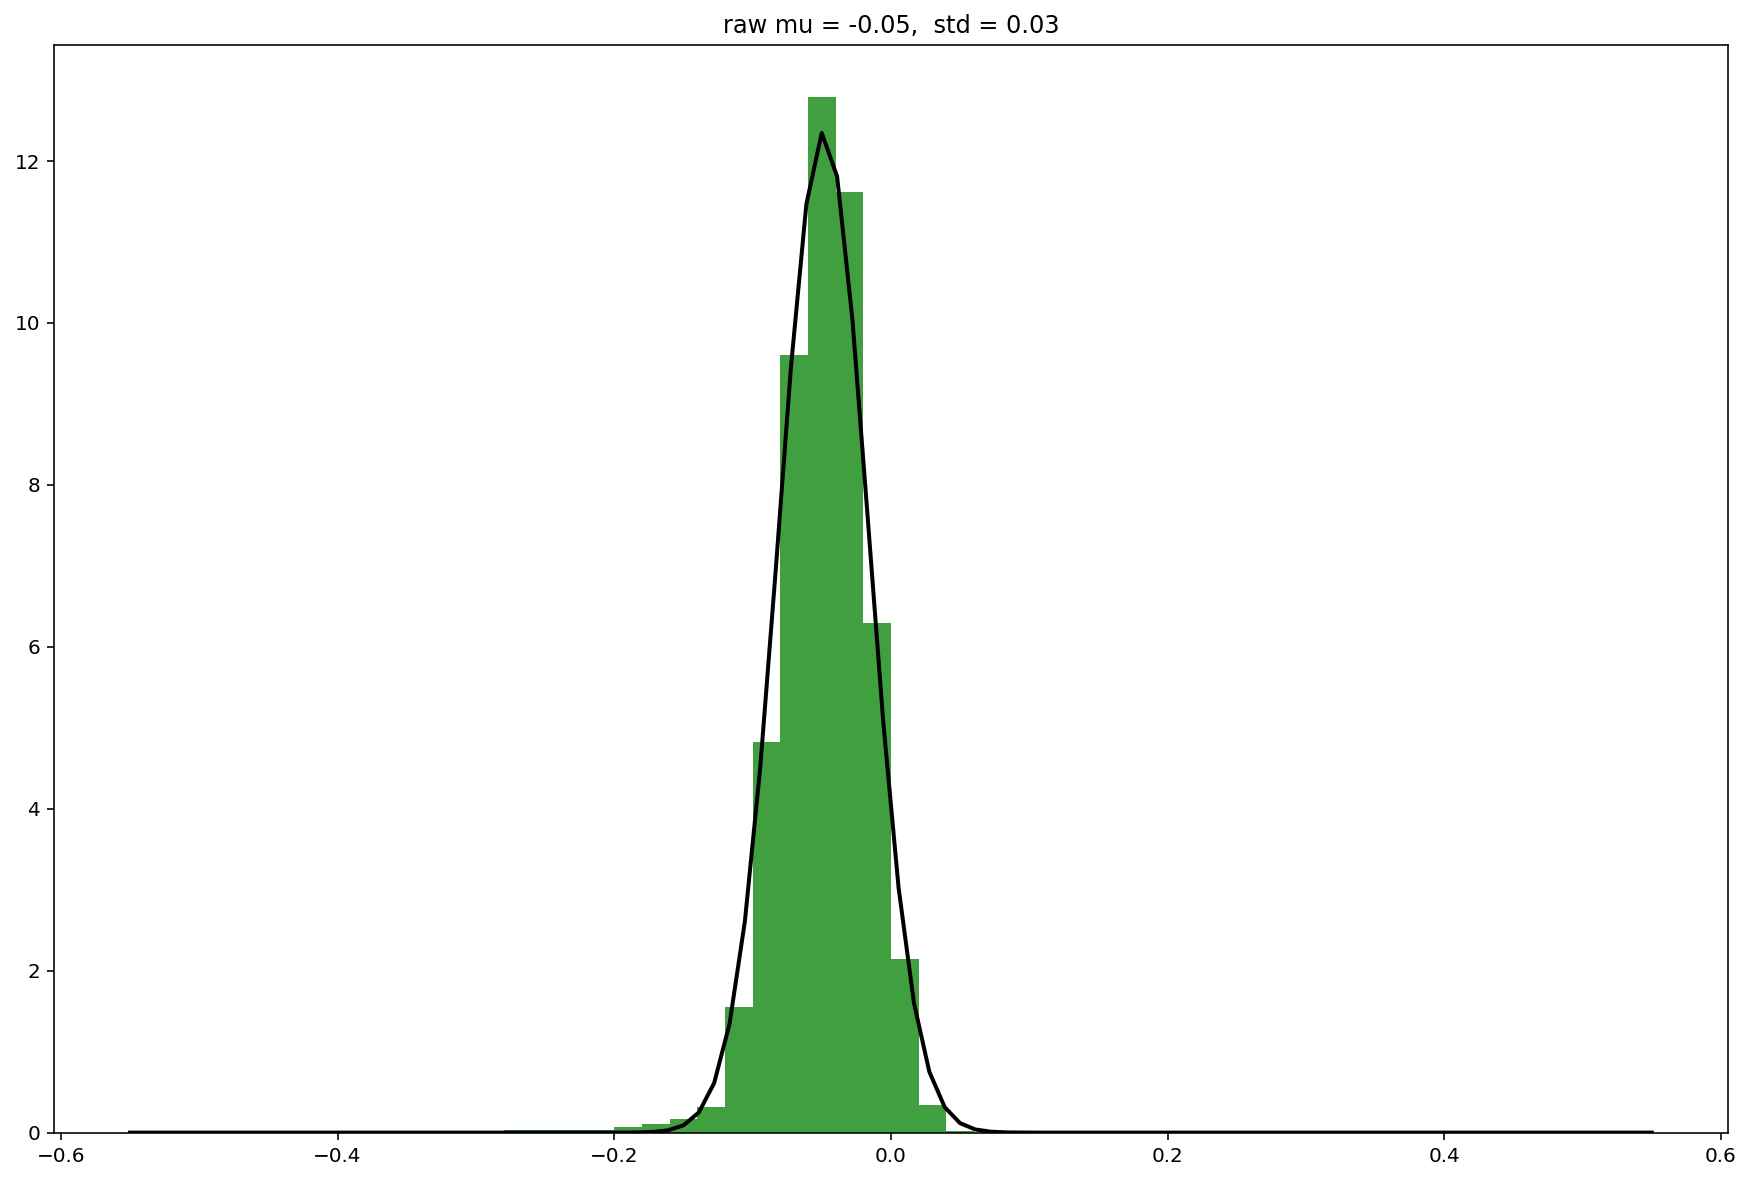

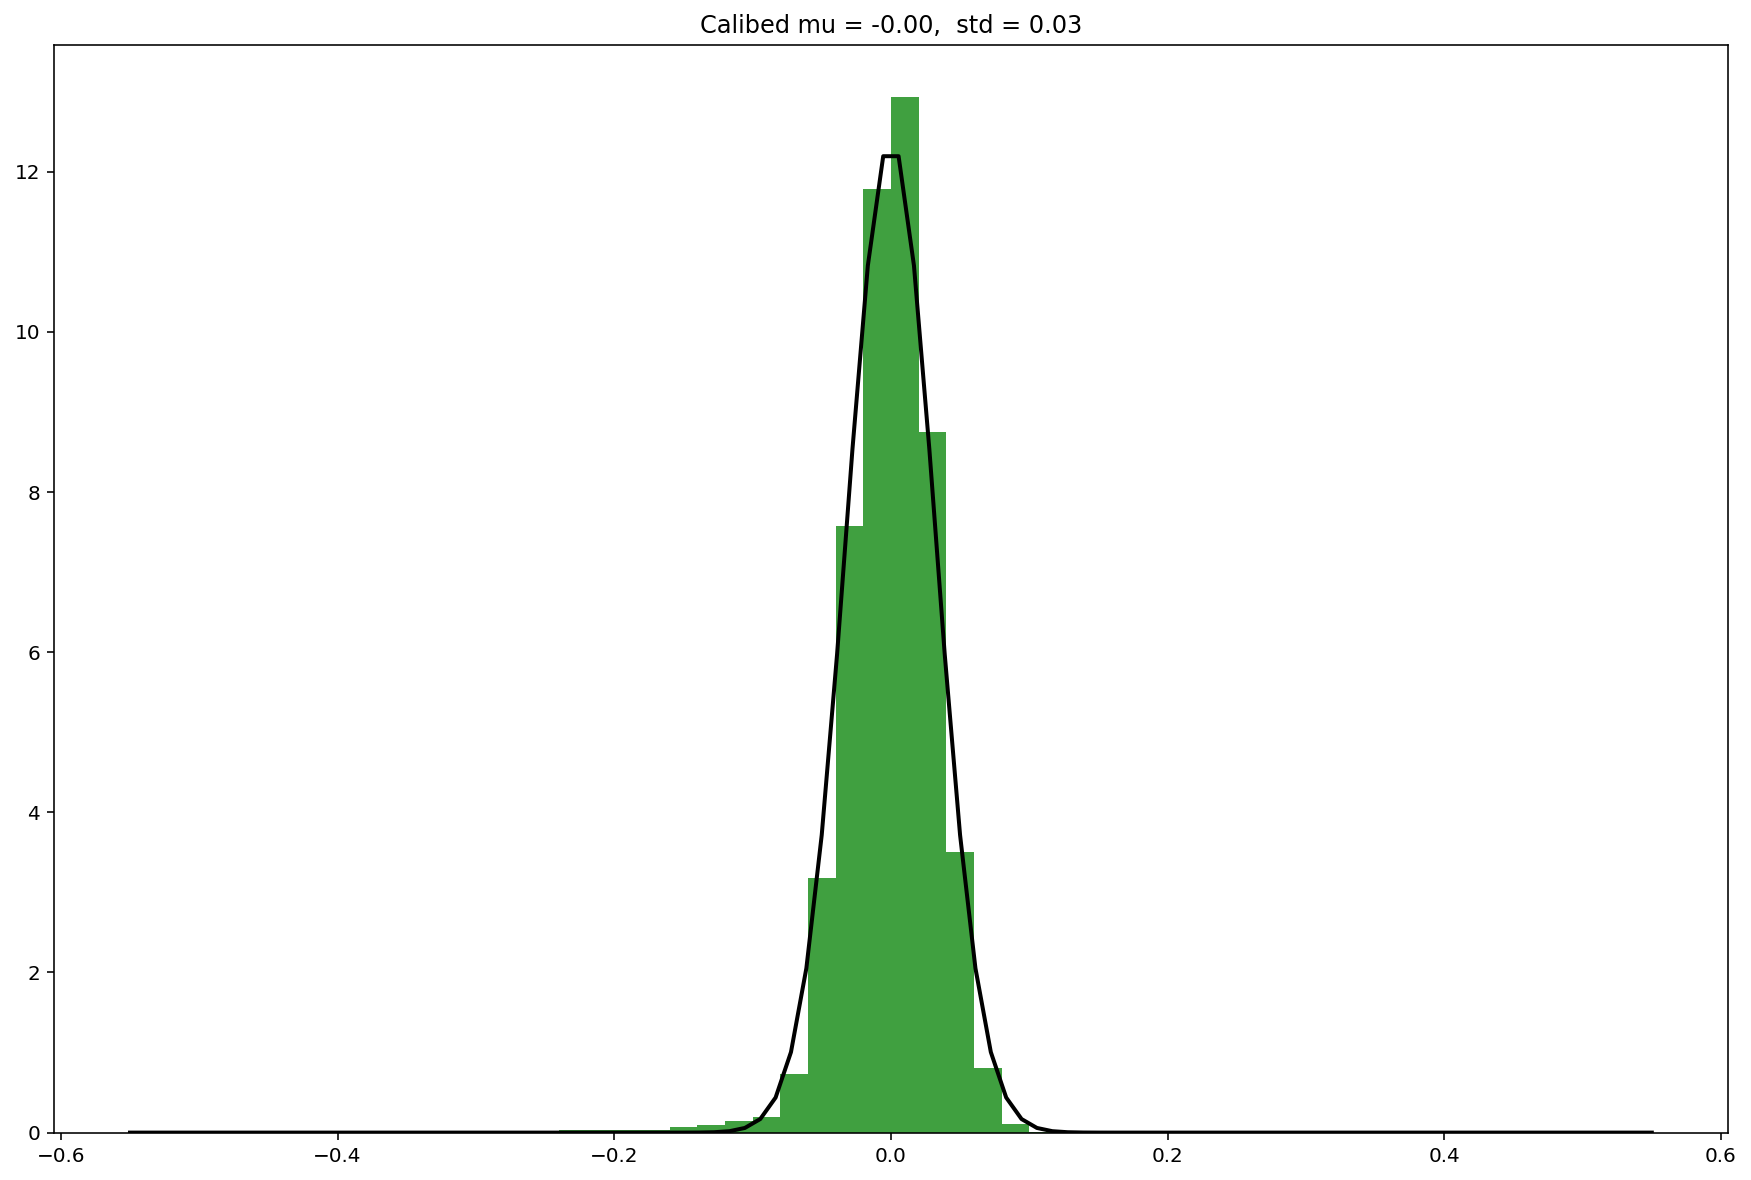

In [41]:
plt.close("all") 
distances = read_distances_swarm_frame(bag, "/swarm_drones/swarm_frame", t0)
plot_distance_err(poses, poses_fused, distances, main_id, nodes, is_show=True)
